#### 1. 데이터 불러오기

##### 1) 리뷰 데이터 합치기

In [ ]:
import pandas as pd

carsales = pd.read_csv('/content/drive/MyDrive/Document/carsales_carwale review.csv', header=None)
topgear = pd.read_csv('/content/drive/MyDrive/Document/Top gear review.csv', header=None)
edmunds = pd.read_csv('/content/drive/MyDrive/Document/Edmunds review.csv', header=None)

review_ls = [carsales, topgear, edmunds]
review = pd.concat(review_ls, ignore_index=True)
review.head()

,0
0,The Hyundai IONIQ 5 N marks a turning point fo...
1,"Any car-maker can produce a fast EV, but the s..."
2,How much does the Hyundai Kona Electric cost?\...
3,The Hyundai IONIQ 5 EV has been a huge success...
4,The Hyundai IONIQ 6 is the second model from t...


In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       203 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


##### 2) 특허 데이터 불러오기

In [ ]:
patents = pd.read_csv('/content/drive/MyDrive/Document/gp_제외.csv', encoding='cp949')
patents.head(3)

,id,title,assignee,inventor/author,publication date,result link,claims,abstract,citedby,ipc,family
0,US-10543754-B2,Charging control apparatus and method for elec...,"Hyundai Motor Company, Kia Motors Corporation","Jin Su JANG, Jae Yong Seong, Taek Hyun Jung, Z...",2020-01-28,https://patents.google.com/patent/US10543754B2/en,15,\nAn EV charging control apparatus may include...,23,42,2
1,US-10675979-B2,In-cable control box mounted on electric vehic...,"Hyundai Motor Company, Kia Motors Corporation","Ji Hown KIM, Chang Min Yang, So Jin Lee",2020-06-09,https://patents.google.com/patent/US10675979B2/en,18,\nAn in-cable control box (ICCB) mounted on an...,23,26,3
2,EP-3229339-B1,Ev wireless charging adjustable flux angle cha...,"Hyundai America Technical Center, Inc., Hyunda...","Allan Lewis, Bilal Javaid, John Robb, Mohammad...",2019-02-20,https://patents.google.com/patent/EP3229339B1/en,12,NaN,23,16,4


In [ ]:
patents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                192 non-null    object
 1   title             191 non-null    object
 2   assignee          94 non-null     object
 3   inventor/author   117 non-null    object
 4   publication date  148 non-null    object
 5   result link       172 non-null    object
 6   claims            192 non-null    int64 
 7   abstract          188 non-null    object
 8   citedby           192 non-null    int64 
 9   ipc               192 non-null    int64 
 10  family            192 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 16.6+ KB


### 추가 1-1. 특허 데이터 클러스터링

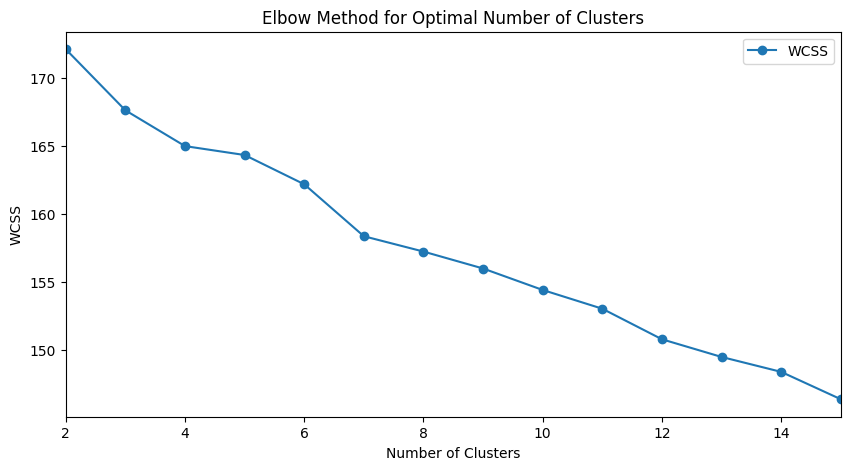

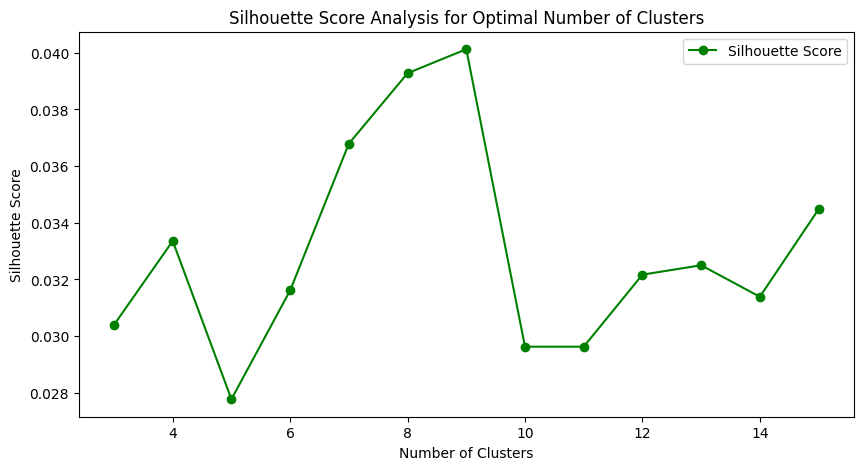

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = pd.DataFrame(patents, columns=['title', 'abstract'])
df['title'] = df['title'].fillna("")
df['abstract'] = df['abstract'].fillna("")
df['combined_text'] = df['title'] + " " + df['abstract']

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_text'])

min_clusters = 2
max_clusters = 15

wcss = []
silhouette_scores = []

for num_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)

    wcss.append(kmeans.inertia_)

    if num_clusters > 1:
        silhouette_avg = silhouette_score(tfidf_matrix, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters, max_clusters + 1), wcss, marker='o', label='WCSS')
plt.xlim([2, 15])
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters + 1, max_clusters + 1), silhouette_scores[1:], marker='o', color='green', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis for Optimal Number of Clusters')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_text'])

num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

df['cluster'] = kmeans.labels_

print(df[['title', 'abstract', 'cluster']])

                                                 title  \
0    Charging control apparatus and method for elec...   
1    In-cable control box mounted on electric vehic...   
2    Ev wireless charging adjustable flux angle cha...   
3    Security method and apparatus for electric veh...   
4    Electric vehicle parallel charging method and ...   
..                                                 ...   
187  Apparatus for Double-Heat Exchanger of eco-fri...   
188  Apparatus and method for controlling driving o...   
189  methods for controlling drive mode of leak dia...   
190            Cooling air flowing systme for vehicle    
191                     Hybrid powertrain for vehicle    

                                              abstract  cluster  
0    \nAn EV charging control apparatus may include...        3  
1    \nAn in-cable control box (ICCB) mounted on an...        3  
2                                                             3  
3    \nA security method and apparatus 

In [ ]:
patents.columns

Index(['id', 'title', 'assignee', 'inventor/author', 'publication date',
       'result link', 'claims', 'abstract', 'citedby', 'ipc', 'family'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

score_df = patents[['claims', 'citedby', 'ipc', 'family']]

# 스케일링
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(score_df)

df_scaled = pd.DataFrame(scaled_features, columns=score_df.columns)

# 각 특성에 가중치를 곱하여 점수 계산
df_scaled['score'] = (
    df_scaled['claims'] * 0.2 +
    df_scaled['citedby'] * 0.3 +
    df_scaled['family'] * 0.3 +
    df_scaled['ipc'] * 0.2
)

df.reset_index(inplace=True)
df['id'] = patents['id']
df['patent_score'] = df_scaled['score']
print(df['patent_score'])

0      0.565655
1      0.579202
2      0.552108
3      0.572990
4      0.464852
         ...   
187    0.097537
188    0.118227
189    0.083744
190    0.052586
191    0.083744
Name: patent_score, Length: 192, dtype: float64


In [ ]:
# 클러스터별 데이터 출력
for cluster_num in sorted(df.index.unique()):
    print(f"\nCluster {cluster_num}")
    display(df.loc[cluster_num][['id', 'title', 'abstract', 'patent_score']])


Cluster 0


,id,title,abstract,patent_score
cluster,,,,
0,US-10543754-B2,Power transmission apparatus for a vehicle,\nA power transmission apparatus for a vehicle...,0.393547
0,US-10543754-B2,Method of reducing drive shaft vibration of an...,Translated from German\n\n\n A method for redu...,0.519424
0,US-10543754-B2,Power transmission system of a hybrid electric...,Translated from German\n\n\n A power transmiss...,0.428798
0,US-10543754-B2,Power transmission system of a hybrid electric...,Translated from German\n\n\n A power transmiss...,0.437172
0,US-10543754-B2,Power transmission system of hybrid electric v...,\nDisclosed is a power transmission apparatus ...,0.328266
0,US-10543754-B2,Power transmission system of hybrid electric v...,\nDisclosed is a power transmission apparatus ...,0.232483
0,US-10543754-B2,Power transmission system of hybrid electric v...,\nDisclosed is a power transmission apparatus ...,0.371877
0,US-10543754-B2,Multy-stage dual clutch transmission for hybri...,"\nAccording to the present invention, a multis...",0.320300
0,US-10543754-B2,Hybrid powertrain for vehicle,\nThe present invention relates to a hybrid po...,0.281744



Cluster 1


,id,title,abstract,patent_score
cluster,,,,
1,US-10675979-B2,Method and device for controlling engine clutc...,\nA method and device for controlling an engin...,0.588276
1,US-10675979-B2,Fail-safe control method for hybrid electric v...,\nA fail-safe control method for a hybrid elec...,0.391291
1,US-10675979-B2,Regenerative braking control system and method...,\nA regenerative braking control system of an ...,0.549256
1,US-10675979-B2,Vehicle and controlling method thereof,"\nA vehicle is provided to include an engine, ...",0.415266
1,US-10675979-B2,System and method for emergency starting a fue...,Translated from German\n\n\n A system for emer...,0.479862
1,US-10675979-B2,Oil supply system of vehicle and control metho...,\nAn oil supply system of a vehicle includes: ...,0.426773
1,US-10675979-B2,Driver selection type rapid heating control me...,\nA driver selection type rapid heating contro...,0.289980
1,US-10675979-B2,Apparatus and method of controlling hybrid veh...,\nAn apparatus for controlling a hybrid vehicl...,0.499409
1,US-10675979-B2,Power control system and method for hybrid veh...,\nA power control system for a hybrid vehicle ...,0.308330



Cluster 2


,id,title,abstract,patent_score
cluster,,,,
2,EP-3229339-B1,Apparatus and method for controlling driving m...,\nAn apparatus and a method for controlling a ...,0.441823
2,EP-3229339-B1,Hybrid vehicle and method of controlling mode ...,\nDisclosed are a method of controlling a mode...,0.478591
2,EP-3229339-B1,Hybrid electric vehicle and method of controll...,"\nDisclosed are a hybrid electric vehicle, whi...",0.583202
2,EP-3229339-B1,Hybrid vehicle and method of controlling mode ...,\nA method of controlling a mode transition of...,0.545241
2,EP-3229339-B1,Hybrid vehicle and method of controlling engin...,\nA method of controlling a hybrid vehicle for...,0.574852
2,EP-3229339-B1,System and method for controlling driving of h...,\nA system and method for controlling driving ...,0.400473
2,EP-3229339-B1,Hybrid vehicle and method of controlling charg...,\nA hybrid vehicle and a method of controlling...,0.456138
2,EP-3229339-B1,Hybrid vehicle and control method of driving m...,,0.426458
2,EP-3229339-B1,Hybrid vehicle and travel control method thereof,\nThe invention relates to a hybrid vehicle an...,0.412956



Cluster 3


,id,title,abstract,patent_score
cluster,,,,
3,US-10404686-B2,Charging control apparatus and method for elec...,\nAn EV charging control apparatus may include...,0.565655
3,US-10404686-B2,In-cable control box mounted on electric vehic...,\nAn in-cable control box (ICCB) mounted on an...,0.579202
3,US-10404686-B2,Ev wireless charging adjustable flux angle cha...,,0.552108
3,US-10404686-B2,Security method and apparatus for electric veh...,\nA security method and apparatus for an elect...,0.572990
3,US-10404686-B2,Electric vehicle parallel charging method and ...,\nAn electric vehicle (EV) parallel charging m...,0.464852
3,US-10404686-B2,Plug-in vehicle and method of controlling the ...,\nA plug-in vehicle is provided which prevents...,0.438793
3,US-10404686-B2,Wireless power transfer method for electric ve...,\nA wireless power transfer (WPT) method based...,0.368823
3,US-10404686-B2,Wireless power transfer method using field win...,\nA wireless power transfer (WPT) method for a...,0.430631
3,US-10404686-B2,Charging control method and apparatus for elec...,"\nA charging control method, performed by an e...",0.311187



Cluster 4


,id,title,abstract,patent_score
cluster,,,,
4,US-10279695-B2,Method and device for supporting electric vehi...,\nThe present disclosure provides a method of ...,0.573424
4,US-10279695-B2,Device and method for mutual authentication fo...,\nProvided are a device and a method for authe...,0.282059
4,US-10279695-B2,Cross-certificate method and device for electr...,\nA cross-certificate method is performed by a...,0.510478
4,US-10279695-B2,Method and apparatus for cross certification f...,\nDisclosed is a cross-certification method pe...,0.254335
4,US-10279695-B2,Cross-certification method and device for char...,\nProvided is an authentication method and app...,0.250108
4,US-10279695-B2,Device and method for mutual authentication fo...,\nProvided are a device and a method for authe...,0.263916
4,US-10279695-B2,Method and apparatus for providing information...,\nMethods and apparatus for providing informat...,0.137931
4,US-10279695-B2,Method and device for providing information ab...,\nDisclosed are a method and device for provid...,0.166502



Cluster 5


,id,title,abstract,patent_score
cluster,,,,
5,US-10703355-B2,Hybrid electric vehicle and heating control me...,\nA passenger compartment of a hybrid electric...,0.511241
5,US-10703355-B2,Device for preventing overcharging of a battery,Translated from German\n\n\n Device for preven...,0.441276
5,US-10703355-B2,Method and apparatus for controlling wireless ...,\nA method for controlling wireless power tran...,0.273424
5,US-10703355-B2,Device and method for controlling an on-board ...,Translated from German\n\n\n An on-board charg...,0.378980
5,US-10703355-B2,Hybrid cooling system and method thereof,\nA hybrid cooling system of a vehicle include...,0.278020
5,US-10703355-B2,On board charger input current limit setting b...,\nThis disclosure relates to the field of elec...,0.399202
5,US-10703355-B2,Liquid phase catalyst for lithium-air batteries,,0.404990
5,US-10703355-B2,Downward Movement Space Type 2attery Pack Moun...,\nThe present invention relates to a battery p...,0.467852
5,US-10703355-B2,Apparatus and method for exhaust gas purifying...,"\nIn accordance with the present invention, an...",0.286315



Cluster 6


,id,title,abstract,patent_score
cluster,,,,
6,US-11084498-B2,Heating control apparatus and method for plug-...,\nA heating control apparatus for a plug-in hy...,0.376458
6,US-11084498-B2,EV vehicle driving sound control system and co...,\nAn EV driving sound control system may inclu...,0.442552
6,US-11084498-B2,METHOD OF CONTROLLING A SOUND OF AN ELECTRIC V...,Translated from German\n\n\n A method for cont...,0.414995
6,US-11084498-B2,Method and apparatus for selectively performin...,\nA method for selectively performing a full b...,0.281837
6,US-11084498-B2,Method of two-step VVL operation learning cont...,\nA method of two-step variable valve lift (VV...,0.353241
6,US-11084498-B2,Method of controlling tone of electric vehicle...,\nA method of controlling a tone of an electri...,0.344813
6,US-11084498-B2,Method for controlling hydrogen cut-off valve ...,\nA method is provided for controlling a hydro...,0.264665
6,US-11084498-B2,Sound control method for hybrid vehicle,\nThe present invention relates to a sound con...,0.344768
6,US-11084498-B2,Control method of hvac and electric load while...,\nThe present invention relates to a control m...,0.099808



Cluster 7


,id,title,abstract,patent_score
cluster,,,,
7,US-11161497-B2,Vehicle and method for automatically selecting...,\nA vehicle is controlled such that a driving ...,0.506369
7,US-11161497-B2,Hybrid vehicle and method of predicting drivin...,\nThe present disclosure provides a hybrid veh...,0.519704
7,US-11161497-B2,Vehicle and method for controlling the same,\nTo minimize a pedal operation of a driver an...,0.393345
7,US-11161497-B2,Vehicle and controlling method thereof,\nThe disclosed present invention relates to a...,0.312956
7,US-11161497-B2,Perovskite solar cell having excellent stabili...,\nVarious aspects of the present invention are...,0.233714
7,US-11161497-B2,Method for controlling driving of hybrid vehic...,\nA method for controlling driving of a hybrid...,0.205704
7,US-11161497-B2,Hybrid Electric Vehicle and control method for...,\nThe present invention provides a vehicle and...,0.136084
7,US-11161497-B2,Apparatus and method for controlling vehicle,Translated from Korean\n\n\n A vehicle control...,0.150123
7,US-11161497-B2,Apparatus for controlling driving mode of hev ...,Translated from Korean\n\n\n The present inven...,0.122537


In [ ]:
# 각 클러스터의 평균 점수 계산
cluster_scores = df.groupby('cluster')['patent_score'].mean().reset_index()
cluster_scores.columns = ['cluster', 'average_score']

print("Patent Scores by Cluster:")
cluster_scores

Patent Scores by Cluster:


,cluster,average_score
0,0,0.278754
1,1,0.306699
2,2,0.321152
3,3,0.313098
4,4,0.304844
5,5,0.282546
6,6,0.223950
7,7,0.247878


### 추가 1-2. 리뷰 데이터 키워드 추출

In [ ]:
review[0]

,0
0,The Hyundai IONIQ 5 N marks a turning point fo...
1,"Any car-maker can produce a fast EV, but the s..."
2,How much does the Hyundai Kona Electric cost?\...
3,The Hyundai IONIQ 5 EV has been a huge success...
4,The Hyundai IONIQ 6 is the second model from t...
...,...
198,"Hyundai, as usual, gives you a lot for your mo..."
199,"confortable and sleek lines, my concern is tha..."
200,This car. Man I love this car. I really love ...
201,Bought the car in early December - sight unsee...


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('vader_lexicon')

r_df = pd.DataFrame(review)

custom_stop_words = ["car", 'charging', 'driver', 'driving', 'electric', 'ev', 'features', 'great', 'hyundai', 'ioniq', 'just', 'kona', 'like', 'miles', 'model', 'new', 'range',
                     'rear', 'seats', 'standard', 'vehicle', 'cars', 'comes', 'comfortable', 'does', 'easy', 'fast', 'good', 'inch', 'lane', 'little', 'road', 'small', 'suv', 'tesla',
                     'time', 'assist', 'auto', 'don', 'evs', 'far', 'feel', 'fun', 'high', 'll', 'really', 'tech', 'use', 'way', 'years', '000', '10', 'available', 'better', 'bit',
                     'blind', 'braking', 'buy', 'cabin', 'charger', 'dual', 'feels', 'hybrid', 'isn', 'level', 'limited', 'long', 'looking', 'lot', 'love', 'make', 'models', 'motor',
                     'need', 'plenty', 'plus', 'powered', 'ride', 'set', 'sound', 'technology', 'test', 'trim', 've', 'wheels', 'year','best', 'big', 'class', 'come', 'console', 'doesn',
                     'family', 'got', 'head', 'home', 'inside', 'kia', 'look', 'looks', 'low', 'makes', 'mode', 'pack', 'point', 'premium', 'pretty', 'quite', 'real', 'right', 'screen',
                     'sel', 'spot', 'start', 'things', 'want', 'world']

all_stop_words = list(TfidfVectorizer(stop_words='english').get_stop_words()) + custom_stop_words

tfidf_vectorizer = TfidfVectorizer(stop_words=all_stop_words, max_features=50)

tfidf_matrix = tfidf_vectorizer.fit_transform(r_df[0])
keywords = tfidf_vectorizer.get_feature_names_out()

sia = SentimentIntensityAnalyzer()

keyword_sentiment_scores = {}

for keyword in keywords:
    keyword_reviews = r_df[r_df[0].str.contains(keyword, case=False, na=False)]

    scores = [sia.polarity_scores(review)['compound'] for review in keyword_reviews[0]]
    if scores:  # 키워드가 포함된 리뷰가 있는 경우에만 평균 계산
        keyword_sentiment_scores[keyword] = sum(scores) / len(scores)
    else:
        keyword_sentiment_scores[keyword] = None  # 키워드가 포함된 리뷰가 없는 경우

print("Keyword Sentiment Scores:")
for keyword, score in keyword_sentiment_scores.items():
    print(f"{keyword}: {score}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Keyword Sentiment Scores:
2023: 0.8913562500000001
acceleration: 0.7740657142857146
awd: 0.7282549999999998
base: 0.9752297872340424
battery: 0.647550724637681
charge: 0.8062100000000001
collision: 0.8990850000000001
control: 0.9227130434782612
cruise: 0.9804344827586209
dc: 0.9816863636363636
design: 0.9184979166666668
did: 0.672422916666667
door: 0.8614333333333335
drive: 0.8060130434782604
eco: 0.8957121621621622
engine: 0.8886411764705882
excellent: 0.8688266666666667
experience: 0.7776124999999999
gets: 0.9101027777777778
getting: 0.8486218750000002
going: 0.918854054054054
hatch: 0.9243514285714287
hours: 0.8458000000000001
including: 0.9445696969696968
infotainment: 0.9838200000000001
interior: 0.9352944444444442
line: 0.8568912280701754
nice: 0.932393181818182
offers: 0.9330925925925927
parking: 0.9782153846153848
people: 0.7982687500000001
performance: 0.8875258064516129
petrol: 0.9266521739130434
power: 0.8989153846153846
price: 0.9188775862068964
regular: 0.8396600000000001


### 2. 데이터 분석

#### 2.1 리뷰 데이터 분석

##### 1) 토픽모델링

In [ ]:
review.head(3)

,0
0,The Hyundai IONIQ 5 N marks a turning point fo...
1,"Any car-maker can produce a fast EV, but the s..."
2,How much does the Hyundai Kona Electric cost?\...


In [ ]:
review_series = pd.Series(review[0])
review_series.head(3)

0    The Hyundai IONIQ 5 N marks a turning point fo...
1    Any car-maker can produce a fast EV, but the s...
2    How much does the Hyundai Kona Electric cost?\...
Name: 0, dtype: object

In [ ]:
review_series = review_series.apply(lambda x: x.lower())

In [ ]:
import nltk
nltk.download('punkt')

review_txt = review_series.apply(lambda row: nltk.word_tokenize(row))
review_txt.head(3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    [the, hyundai, ioniq, 5, n, marks, a, turning,...
1    [any, car-maker, can, produce, a, fast, ev, ,,...
2    [how, much, does, the, hyundai, kona, electric...
Name: 0, dtype: object

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
review_txt = review_txt.apply(lambda x: [word for word in x if word not in (stop)])
review_txt.head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [hyundai, ioniq, 5, n, marks, turning, point, ...
1    [car-maker, produce, fast, ev, ,, soon-to-laun...
2    [much, hyundai, kona, electric, cost, ?, 2023,...
Name: 0, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
review_txt = review_txt.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
review_txt.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


0    [hyundai, ioniq, 5, n, mark, turn, point, kore...
1    [car-maker, produce, fast, ev, ,, soon-to-laun...
2    [much, hyundai, kona, electric, cost, ?, 2023,...
3    [hyundai, ioniq, 5, ev, huge, success, korean,...
4    [hyundai, ioniq, 6, second, model, korean, gia...
Name: 0, dtype: object

In [ ]:
#1글자 단어 삭제
tokenized_review = review_txt.apply(lambda x: [word for word in x if len(word) > 1])
tokenized_review[:3]

0    [hyundai, ioniq, mark, turn, point, korean, br...
1    [car-maker, produce, fast, ev, soon-to-launch,...
2    [much, hyundai, kona, electric, cost, 2023, hy...
Name: 0, dtype: object

In [ ]:
from string import punctuation
for p in punctuation :
  tokenized_review = tokenized_review.replace(p, "")

tokenized_review[:3]

0    [hyundai, ioniq, mark, turn, point, korean, br...
1    [car-maker, produce, fast, ev, soon-to-launch,...
2    [much, hyundai, kona, electric, cost, 2023, hy...
Name: 0, dtype: object

In [ ]:
words_list = ["\'s", "fe", "car", "hyundai", 'one', 'miles', 'ioniq', 'kona', 'i30n', 'maybe', "n\'t", 'like', 'santa', 'tucson', "get", 'ev', "--", 'would', 'drive', 'vw', "``", '2022', 'two', 'also',
              'even', 'i20n', 'rn22e', 'cars', "\'\'", 'much', 'say', 'go', 'tesla', 'better', '..', 'i30', 'electric', 'take', 'make', 'every', 'around', 'come', 'work', 'lot', 'look', 'vehicle',
              'something', 'new', 'buy', 'new', 'really', 'great', 'love', 'well', 'come', 'need','little', 'give', 'think', 'everything', 'see', 'second', 'first', 'nexo', 'evs', '2024', 'happier',
              'help', 'point', 'feature', 'standard', 'system', 'model', 'i10', 'hybrid', 'still', 'include', 'put', 'rival', '2023', 'feel', 'never', 'rear', 'front', 'many', 'ioniq5', 'use', 'back',
              'part', 'want', 'truck', 'way', 'offer', 'pickup', 'know', 'range', 'issue', 'problem', 'zero', 'rodgers', 'yes', 'seem', 'perfect', 'different', 'unit', 'easy', 'less', 'hear', 'deal',
              'dealer', 'degrees', 'top', 'months', 'suv', '-the', 'assist', 'bring', 'gt', 'base', 'another', 'longer', 'i20', 'nice', 'fiesta', 'bite', 'life', 'cent', 'far', 'hydrogen', 'fcv',
              'tell', 'van', 'staria', 'uk', 'keep', 'kia', 'brand', 'good', 'best', 'estimate', 'per', 'three', 'almost', 'purchase', 'sel', 'hope', 'pony', 'epiq', 'park', 'plus', 'available',
              'ev6', 'long', 'high', 'test', 'full', 'limit', "\'re", 'amaze', 'years', 'combination', 'sport', 'right', 'people', 'year', 'update', '2019', 'former', 'sort', 'maverick', 'order', 'ford', 'city',
              'excellent', 'try', 'epa', 'without', 'things', 'number', 'enough', 'pretty', 'may', 'ionic', 'though', '...', 'indeed', 'level', 'se', 'close', 'least', '2021', 'replace', 'leaf', 'days', 'disappoint',
              'i40', 'versions', '300', 'world', 'via', 'anything', 'free', 'please', 'ride', 'jenni', 'day', 'pay', 'behind', 'motor', 'side', 'decent', 'n-line', '8.0', 'winter', 'expect', 'review', 'us', 'sell',
              'could', 'fix', 'tech', 'support', 'let', 'find', 'communicate', 'effective', 'worry', 'money', 'version', 'claim', 'technology', 'ever', 'pull', 'extra', "\'m", 'learn', 'wrong', 'fill', 'reason',
              'koera', 'status', 'flaw', 'wait', 'rev', 'bayon', 'build', 'mean', 'mode', 'diesel', 'market', 'fact', 'major', 'specs', 'mile', 'show', 'choice', 'average', 'techniq', 'live', 'set', 'kmph', 'spec',
              'sound+', 'low', 'pair', 'hit', 'touch', 'week', "\'ve", 'since', 'dealership', '40a', '1.6-litre', 'road', 'ensure', 'allow', 'mini-mpv', 'start', 'course', 'yet', 'thing', 'inside', 'provide', 'actually',
              'launch', 'previous', 'cold', 'hot', '8.5', 'repair', 'change', 'six-speed', 'seven-speed', 'elite', 'value', 'view', 'lower', 'extend', 'weather', 'concern', 'plenty', 'rid', 'haul', 'follow', 'save', 'total',
              'class', 'audi', 'smaller', 'cargo', 'rat', 'quite', 'leave', 'km', 'although', 'whole', 'ultimate', 'buyers', 'end', 'amperage', 'variants', 'nothing', 'bother', 'compare', 'several', 'contrast', 'able', 'real',
              'computer', 'bmw', 'anxiety', 'pack', 'proper', 'i800', 'plan', 'enjoy', 'complete', 'import', 'away', 'sit', 'four', 'instead', 'track', 'bin', 'underneath', 'firm', 'fit', 'eye', 'always', 'open',
              'except', 'overall', 'bolt', 'chevy', 'wife', 'i-pedal', 'default', 'sure', 'division', 'fall', 'easily', '258', 'become', 'genesis', 'roll', 'current', 'nissan', 'thank', 'call', 'continue', 'public',
              'mondeo', 'visit', 'korea', 'seven', 'discovery', 'finally', 'super', 'multilink', 'clean', '7500', 'rather', 'canada', 'already', 'hours', '8k', 'regret', 'luxury', 'mercedes', 'lifetime', 'msrp',
              'move', 'run', 'add', 'lead', 'lease', 'perk', 'reduce', 'credit', 'pant', 'mi', 'terrific', 'head', 'options', 'seriously', 'con', 'strange', 'require', '12v', 'die', 'bad', 'unlike', 'port', 'either', 'grown-up',
              'fresh', '64kwh', 'might', 'ahead', 'convince', 'recall', '50', 'remain', 'turn']
tokenized_review = tokenized_review.apply(lambda x: [words for words in x if words not in (words_list)])

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_review)
corpus = [dictionary.doc2bow(txt) for txt in tokenized_review]
corpus[10]

[(74, 1),
 (79, 1),
 (87, 2),
 (95, 2),
 (108, 2),
 (117, 1),
 (127, 1),
 (131, 2),
 (148, 2),
 (158, 3),
 (162, 1),
 (176, 1),
 (192, 3),
 (201, 1),
 (203, 1),
 (275, 1),
 (284, 1),
 (307, 1),
 (313, 1),
 (317, 1),
 (325, 1),
 (340, 1),
 (352, 1),
 (384, 1),
 (421, 1),
 (438, 1),
 (454, 1),
 (458, 1),
 (475, 4),
 (477, 2),
 (483, 1),
 (499, 1),
 (519, 2),
 (520, 2),
 (549, 1),
 (551, 3),
 (561, 1),
 (593, 3),
 (594, 1),
 (597, 1),
 (637, 1),
 (646, 1),
 (659, 1),
 (693, 1),
 (717, 1),
 (720, 1),
 (737, 1),
 (800, 1),
 (828, 1),
 (904, 2),
 (913, 1),
 (926, 1),
 (1049, 1),
 (1053, 1),
 (1066, 1),
 (1105, 1),
 (1118, 1),
 (1134, 1),
 (1146, 1),
 (1162, 1),
 (1166, 1),
 (1173, 1),
 (1199, 4),
 (1205, 1),
 (1222, 2),
 (1341, 1),
 (1362, 1),
 (1391, 1),
 (1451, 2),
 (1466, 1),
 (1489, 1),
 (1492, 1),
 (1525, 1),
 (1620, 1),
 (1665, 1),
 (1680, 1),
 (1699, 2),
 (1718, 1),
 (1741, 1),
 (1783, 1),
 (1819, 1),
 (1830, 1),
 (1920, 1),
 (1964, 1),
 (2004, 1),
 (2076, 1),
 (2389, 1),
 (2399, 2),


In [ ]:
len(dictionary)

6629

In [ ]:
#Coherence 및 Perplexity score 계산
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    perplexity_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=tokenized_review, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perplexity_values

def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 20;
    start = 2;
    step = 2;

    model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)
    x = range(start, limit, step)

    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

    plt.plot(x, perplexity_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Perplexity score")
    plt.legend(("perplexity_values"), loc='best')
    plt.show()

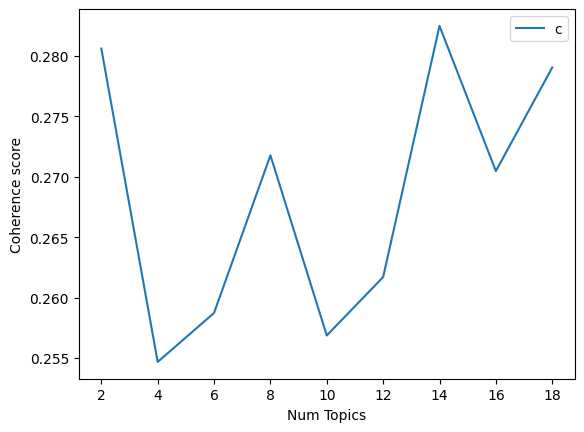

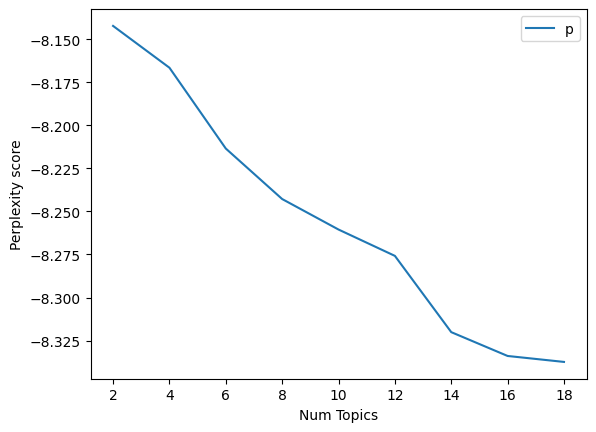

In [ ]:
find_optimal_number_of_topics(dictionary, corpus, tokenized_review)

In [ ]:
NUM_TOPICS = 14
ldamodel = gensim.models.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics()
for topic in topics:
  print(topic)

(0, '0.012*"cruz" + 0.009*"engine" + 0.005*"battery" + 0.004*"wheel" + 0.004*"style" + 0.004*"light" + 0.004*"crossovers" + 0.004*"hatch" + 0.004*"gearbox" + 0.004*"manual"')
(1, '0.009*"charge" + 0.007*"experience" + 0.006*"engineer" + 0.005*"time" + 0.005*"power" + 0.005*"performance" + 0.004*"driver" + 0.004*"sound" + 0.004*"steer" + 0.004*"production"')
(2, '0.007*"seat" + 0.006*"carrier" + 0.006*"battery" + 0.005*"design" + 0.005*"camper" + 0.004*"size" + 0.004*"light" + 0.002*"price" + 0.002*"experience" + 0.002*"headlights"')
(3, '0.012*"performance" + 0.009*"power" + 0.007*"charge" + 0.005*"control" + 0.005*"speed" + 0.004*"wheel" + 0.004*"time" + 0.004*"battery" + 0.004*"function" + 0.003*"seat"')
(4, '0.008*"tourer" + 0.005*"systems" + 0.005*"fun" + 0.005*"petrol" + 0.003*"seat" + 0.003*"power" + 0.003*"interior" + 0.003*"driver" + 0.003*"lane" + 0.003*"brake"')
(5, '0.015*"charge" + 0.007*"battery" + 0.007*"time" + 0.005*"hatch" + 0.004*"seat" + 0.004*"space" + 0.004*"circui

Cruise & Engine Performance
주요 키워드: cruz, engine, battery, wheel, style, light, crossovers, hatch, gearbox, manual

Charging & Performance Experience
주요 키워드: charge, experience, engineer, time, power, performance, driver, sound, steer, production

Camper Design & Battery Life
주요 키워드: seat, carrier, battery, design, camper, size, light, price, experience, headlights

Power & Speed Control
주요 키워드: performance, power, charge, control, speed, wheel, time, battery, function, seat

Touring & Petrol Systems
주요 키워드: tourer, systems, fun, petrol, seat, power, interior, driver, lane, brake

Charging & Battery Efficiency
주요 키워드: charge, battery, time, hatch, seat, space, circuit, locate, grille, trip

Charging Service & Cost Efficiency
주요 키워드: charge, service, price, interior, space, home, quality, time, cost, speed

Comfort & Charging Features
주요 키워드: seat, charge, battery, control, power, interior, comfortable, small, lane, brake

Driver Control & Safety
주요 키워드: seat, charge, battery, steer, wheel, control, power, driver, brake, safety

Battery & Driver Interaction
주요 키워드: battery, charge, screen, control, seat, wheel, brake, sound, time, driver

Cost & Gas Efficiency
주요 키워드: price, gas, cost, maintenance, fun, charge, power, fast, comfortable, speed

Family & Charging Needs
주요 키워드: charge, seat, family, time, station, power, price, charger, wheel, fast

Fuel & Battery Costs
주요 키워드: price, charge, petrol, seat, expensive, style, wheel, fuel, load, battery

Petrol & Vehicle Design
주요 키워드: petrol, light, trim, seat, hatch, engines, rational, gearbox, slow, facelift

#### 추가. 단어 간 유사도

In [ ]:
df.reset_index(inplace=True)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_keywords(text_data, top_n=10):
    custom_stop_words = ['input', 'second', 'connected', 'vehicle', 'output', 'hybrid', 'rotary', 'element', 'mode', 'torque', 'planetary', 'selectively', 'set', 'electric', 'fixed',
                         'current', 'ev', 'method', 'apparatus', 'contract', 'certificate', 'pnc', 'cs', 'secc', 'line', 'step', 'based', 'traffic', 'present', 'invention', 'symmetric',
                         'soc', 'required', 'wireless', 'pairing', 'receiving', 'cross', 'service', 'chain', 'authorization', 'provider', 'message', 'including', 'unit', 'hydrogen',
                         'order', 'solar', 'distance', 'section', 'road', 'eco', 'user', 'supply', 'v2g', 'evcc', 'certification', 'root', 'supply', 'authentication', '100', 'value',
                         'includes', 'friendly', 'authority', 'sub', 'steps', 'setup', 'verifying', 'mutual', 'relates', 'according', 'request', 'key', 'list', 'session', 'response',
                         'station', 'evse', 'equipment', 'rootca', 'comprises', 'communication', 'result', 'used', 'configured', 'verification', 'providing', 'accepting',  'providers',
                         'using', 'situation', 'associated', 'supporting', 'pad', 'state']

    all_stop_words = list(TfidfVectorizer(stop_words='english').get_stop_words()) + custom_stop_words

    vectorizer = TfidfVectorizer(stop_words=all_stop_words, max_features=top_n)
    tfidf_matrix = vectorizer.fit_transform(text_data)

    feature_names = vectorizer.get_feature_names_out()
    scores = tfidf_matrix.sum(axis=0).A1
    keyword_scores = [(feature_names[i], scores[i]) for i in range(len(feature_names))]

    keyword_scores = sorted(keyword_scores, key=lambda x: x[1], reverse=True)

    return keyword_scores[:top_n]

# 특허 제목과 초록 텍스트에서 주요 키워드 추출
cluster0_keyword = extract_keywords(df[df['cluster']==0]['combined_text'], top_n=10)
cluster1_keyword = extract_keywords(df[df['cluster']==1]['combined_text'], top_n=10)
cluster2_keyword = extract_keywords(df[df['cluster']==2]['combined_text'], top_n=10)
cluster3_keyword = extract_keywords(df[df['cluster']==3]['combined_text'], top_n=10)
cluster4_keyword = extract_keywords(df[df['cluster']==4]['combined_text'], top_n=10)
cluster5_keyword = extract_keywords(df[df['cluster']==5]['combined_text'], top_n=10)
cluster6_keyword = extract_keywords(df[df['cluster']==6]['combined_text'], top_n=10)
cluster7_keyword = extract_keywords(df[df['cluster']==7]['combined_text'], top_n=10)

print("Top 10 Keywords from cluster0:")
for keyword, score in cluster0_keyword:
    print(f"{keyword}")

print("Top 10 Keywords from cluster1:")
for keyword, score in cluster1_keyword:
    print(f"{keyword}")

print("Top 10 Keywords from cluster2:")
for keyword, score in cluster2_keyword:
    print(f"{keyword}")

print("Top 10 Keywords from cluster3:")
for keyword, score in cluster3_keyword:
    print(f"{keyword}")

print("Top 10 Keywords from cluster4:")
for keyword, score in cluster4_keyword:
    print(f"{keyword}")

print("Top 10 Keywords from cluster5:")
for keyword, score in cluster5_keyword:
    print(f"{keyword}")

print("Top 10 Keywords from cluster6:")
for keyword, score in cluster6_keyword:
    print(f"{keyword}")

print("Top 10 Keywords from cluster7:")
for keyword, score in cluster7_keyword:
    print(f"{keyword}")


Top 10 Keywords from cluster0:
shaft
transmission
power
gear
motor
engine
drive
driving
clutch
generator
Top 10 Keywords from cluster1:
engine
battery
driving
control
motor
power
speed
controlling
clutch
controller
Top 10 Keywords from cluster2:
driving
time
control
controlling
determining
engine
power
controller
transition
transmitter
Top 10 Keywords from cluster3:
charging
power
information
device
controller
control
transfer
battery
transmitting
performing
Top 10 Keywords from cluster4:
charging
device
transmitting
information
operator
power
disclosure
generating
generation
security
Top 10 Keywords from cluster5:
cooling
air
battery
module
coolant
fuel
control
temperature
heat
heating
Top 10 Keywords from cluster6:
control
driving
engine
fuel
motor
sound
controlling
power
determining
condition
Top 10 Keywords from cluster7:
information
driving
control
light
driver
controlling
plurality
wheel
charging
regenerative


In [ ]:
keyword0 = [keyword for keyword, score in cluster0_keyword]
keyword1 = [keyword for keyword, score in cluster1_keyword]
keyword2 = [keyword for keyword, score in cluster2_keyword]
keyword3 = [keyword for keyword, score in cluster3_keyword]
keyword4 = [keyword for keyword, score in cluster4_keyword]
keyword5 = [keyword for keyword, score in cluster5_keyword]
keyword6 = [keyword for keyword, score in cluster6_keyword]
keyword7 = [keyword for keyword, score in cluster7_keyword]

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cluster_keywords = {0: keyword0, 1: keyword1, 2: keyword2, 3: keyword3, 4: keyword4, 5: keyword5, 6: keyword6, 7: keyword7}

review_keywords = {0: ['cruz', 'engine', 'battery', 'wheel', 'style', 'light', 'crossovers', 'hatch', 'gearbox', 'manual'],
    1: ['charge', 'experience', 'engineer', 'time', 'power', 'performance', 'driver', 'sound', 'steer', 'production'],
    2: ['seat', 'carrier', 'battery', 'design', 'camper', 'size', 'light', 'price', 'experience', 'headlights'],
    3: ['performance', 'power', 'charge', 'control', 'speed', 'wheel', 'time', 'battery', 'function', 'seat'],
    4: ['tourer', 'systems', 'fun', 'petrol', 'seat', 'power', 'interior', 'driver', 'lane', 'brake'],
    5: ['charge', 'battery', 'time', 'hatch', 'seat', 'space', 'circuit', 'locate', 'grille', 'trip'],
    6: ['charge', 'service', 'price', 'interior', 'space', 'home', 'quality', 'time', 'cost', 'speed'],
    7: ['seat', 'charge', 'battery', 'control', 'power', 'interior', 'comfortable', 'small', 'lane', 'brake'],
    8: ['seat', 'charge', 'battery', 'steer', 'wheel', 'control', 'power', 'driver', 'brake', 'safety'],
    9: ['battery', 'charge', 'screen', 'control', 'seat', 'wheel', 'brake', 'sound', 'time', 'driver'],
    10: ['price', 'gas', 'cost', 'maintenance', 'fun', 'charge', 'power', 'fast', 'comfortable', 'speed'],
    11: ['charge', 'seat', 'family', 'time', 'station', 'power', 'price', 'charger', 'wheel', 'fast'],
    12: ['price', 'charge', 'petrol', 'seat', 'expensive', 'style', 'wheel', 'fuel', 'load', 'battery'],
    13: ['petrol', 'light', 'trim', 'seat', 'hatch', 'engines', 'rational', 'gearbox', 'slow', 'facelift']}

def get_tfidf_vectorizer(keywords_list):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    return tfidf_vectorizer.fit_transform([' '.join(keywords) for keywords in keywords_list])

all_keywords = list(cluster_keywords.values()) + list(review_keywords.values())
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer.fit([' '.join(keywords) for keywords in all_keywords])

cluster_tfidf = tfidf_vectorizer.transform([' '.join(keywords) for keywords in cluster_keywords.values()])
review_tfidf = tfidf_vectorizer.transform([' '.join(keywords) for keywords in review_keywords.values()])

def compute_cosine_similarity(tfidf_matrix1, tfidf_matrix2):
    return cosine_similarity(tfidf_matrix1, tfidf_matrix2)

similarity_matrix = compute_cosine_similarity(cluster_tfidf, review_tfidf)

print("Cosine Similarity between clusters and review topics:")
for i, cluster_sim in enumerate(similarity_matrix):
    print(f"Cluster {i} vs Review Topics:")
    for j, score in enumerate(cluster_sim):
        print(f"  Review Topic {j}: Similarity = {score:.4f}")

Cosine Similarity between clusters and review topics:
Cluster 0 vs Review Topics:
  Review Topic 0: Similarity = 0.0649
  Review Topic 1: Similarity = 0.0276
  Review Topic 2: Similarity = 0.0000
  Review Topic 3: Similarity = 0.0335
  Review Topic 4: Similarity = 0.0275
  Review Topic 5: Similarity = 0.0000
  Review Topic 6: Similarity = 0.0000
  Review Topic 7: Similarity = 0.0311
  Review Topic 8: Similarity = 0.0331
  Review Topic 9: Similarity = 0.0000
  Review Topic 10: Similarity = 0.0269
  Review Topic 11: Similarity = 0.0290
  Review Topic 12: Similarity = 0.0000
  Review Topic 13: Similarity = 0.0000
Cluster 1 vs Review Topics:
  Review Topic 0: Similarity = 0.1224
  Review Topic 1: Similarity = 0.0348
  Review Topic 2: Similarity = 0.0392
  Review Topic 3: Similarity = 0.2715
  Review Topic 4: Similarity = 0.0347
  Review Topic 5: Similarity = 0.0414
  Review Topic 6: Similarity = 0.0949
  Review Topic 7: Similarity = 0.1397
  Review Topic 8: Similarity = 0.1490
  Review Top

#### 추가. 리뷰 키워드 감정 점수 계산

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

analyzer = SentimentIntensityAnalyzer()

analyzer = SentimentIntensityAnalyzer()

r_df = pd.DataFrame(review)

review_keywords = {0: ['cruz', 'engine', 'battery', 'wheel', 'style', 'light', 'crossovers', 'hatch', 'gearbox', 'manual'],
    1: ['charge', 'experience', 'engineer', 'time', 'power', 'performance', 'driver', 'sound', 'steer', 'production'],
    2: ['seat', 'carrier', 'battery', 'design', 'camper', 'size', 'light', 'price', 'experience', 'headlights'],
    3: ['performance', 'power', 'charge', 'control', 'speed', 'wheel', 'time', 'battery', 'function', 'seat'],
    4: ['tourer', 'systems', 'fun', 'petrol', 'seat', 'power', 'interior', 'driver', 'lane', 'brake'],
    5: ['charge', 'battery', 'time', 'hatch', 'seat', 'space', 'circuit', 'locate', 'grille', 'trip'],
    6: ['charge', 'service', 'price', 'interior', 'space', 'home', 'quality', 'time', 'cost', 'speed'],
    7: ['seat', 'charge', 'battery', 'control', 'power', 'interior', 'comfortable', 'small', 'lane', 'brake'],
    8: ['seat', 'charge', 'battery', 'steer', 'wheel', 'control', 'power', 'driver', 'brake', 'safety'],
    9: ['battery', 'charge', 'screen', 'control', 'seat', 'wheel', 'brake', 'sound', 'time', 'driver'],
    10: ['price', 'gas', 'cost', 'maintenance', 'fun', 'charge', 'power', 'fast', 'comfortable', 'speed'],
    11: ['charge', 'seat', 'family', 'time', 'station', 'power', 'price', 'charger', 'wheel', 'fast'],
    12: ['price', 'charge', 'petrol', 'seat', 'expensive', 'style', 'wheel', 'fuel', 'load', 'battery'],
    13: ['petrol', 'light', 'trim', 'seat', 'hatch', 'engines', 'rational', 'gearbox', 'slow', 'facelift']}

keyword_sentiment = {i: {keyword: [] for keyword in review_keywords[i]} for i in range(len(review_keywords))}

for review in r_df[0]:
    for topic_id, keywords in review_keywords.items():
        for keyword in keywords:
            if keyword in review.lower():
                sentiment = analyzer.polarity_scores(review)
                keyword_sentiment[topic_id][keyword].append(sentiment['compound'])

keyword_avg_sentiment = {
    topic_id: {keyword: np.mean(scores) if scores else None for keyword, scores in keywords.items()}
    for topic_id, keywords in keyword_sentiment.items()
}

print("Average Sentiment Scores for Each Keyword by Review Topic:")
for topic_id, topic_keywords in keyword_avg_sentiment.items():
    print(f"Topic {topic_id}:")
    for keyword, avg_score in topic_keywords.items():
        if avg_score is not None:
            print(f"  Keyword '{keyword}': Average Sentiment Score = {avg_score:.4f}")
        else:
            print(f"  Keyword '{keyword}' not found in any review.")

Average Sentiment Scores for Each Keyword by Review Topic:
Topic 0:
  Keyword 'cruz': Average Sentiment Score = 0.9983
  Keyword 'engine': Average Sentiment Score = 0.9224
  Keyword 'battery': Average Sentiment Score = 0.6758
  Keyword 'wheel': Average Sentiment Score = 0.9012
  Keyword 'style': Average Sentiment Score = 0.9756
  Keyword 'light': Average Sentiment Score = 0.9016
  Keyword 'crossovers': Average Sentiment Score = 0.9686
  Keyword 'hatch': Average Sentiment Score = 0.9285
  Keyword 'gearbox': Average Sentiment Score = 0.9954
  Keyword 'manual': Average Sentiment Score = 0.9907
Topic 1:
  Keyword 'charge': Average Sentiment Score = 0.8269
  Keyword 'experience': Average Sentiment Score = 0.8249
  Keyword 'engineer': Average Sentiment Score = 0.9962
  Keyword 'time': Average Sentiment Score = 0.7627
  Keyword 'power': Average Sentiment Score = 0.9210
  Keyword 'performance': Average Sentiment Score = 0.9245
  Keyword 'driver': Average Sentiment Score = 0.8712
  Keyword 'sou

topic 0 : 0.92581
topic 1 : 0.8943
topic 2 : 0.90916
topic 3 : 0.86387
topic 4 : 0.81259
topic 5 : 0.87062
topic 6 : 0.86563
topic 7 : 0.88003
topic 8 : 0.87218
topic 9 : 0.85974
topic 10 : 0.87058
topic 11 : 0.88159
topic 12 : 0.80742
topic 13 : 0.91754

In [ ]:
import pandas as pd

topics = ['topic 0', 'topic 1', 'topic 2', 'topic 3', 'topic 4', 'topic 5', 'topic 6', 'topic 7', 'topic 8', 'topic 9', 'topic 10', 'topic 11', 'topic 12', 'topic 13']
ss = [0.92851, 0.8943, 0.90916, 0.86387, 0.81259, 0.87062, 0.86563, 0.88003, 0.87218, 0.85974, 0.87058, 0.88159, 0.80742, 0.91754]

s_t_df = pd.DataFrame({'topic': topics, 'average_score': ss})
s_t_df

,topic,average_score
0,topic 0,0.92851
1,topic 1,0.89430
2,topic 2,0.90916
3,topic 3,0.86387
4,topic 4,0.81259
5,topic 5,0.87062
6,topic 6,0.86563
7,topic 7,0.88003
8,topic 8,0.87218
9,topic 9,0.85974


#### 추가. 이종 네트워크

In [ ]:
cluster_scores['average_score']

,average_score
0,0.278754
1,0.306699
2,0.321152
3,0.313098
4,0.304844
5,0.282546
6,0.223950
7,0.247878


In [ ]:
review_keywords

{0: ['cruz',
  'engine',
  'battery',
  'wheel',
  'style',
  'light',
  'crossovers',
  'hatch',
  'gearbox',
  'manual'],
 1: ['charge',
  'experience',
  'engineer',
  'time',
  'power',
  'performance',
  'driver',
  'sound',
  'steer',
  'production'],
 2: ['seat',
  'carrier',
  'battery',
  'design',
  'camper',
  'size',
  'light',
  'price',
  'experience',
  'headlights'],
 3: ['performance',
  'power',
  'charge',
  'control',
  'speed',
  'wheel',
  'time',
  'battery',
  'function',
  'seat'],
 4: ['tourer',
  'systems',
  'fun',
  'petrol',
  'seat',
  'power',
  'interior',
  'driver',
  'lane',
  'brake'],
 5: ['charge',
  'battery',
  'time',
  'hatch',
  'seat',
  'space',
  'circuit',
  'locate',
  'grille',
  'trip'],
 6: ['charge',
  'service',
  'price',
  'interior',
  'space',
  'home',
  'quality',
  'time',
  'cost',
  'speed'],
 7: ['seat',
  'charge',
  'battery',
  'control',
  'power',
  'interior',
  'comfortable',
  'small',
  'lane',
  'brake'],
 8: ['s

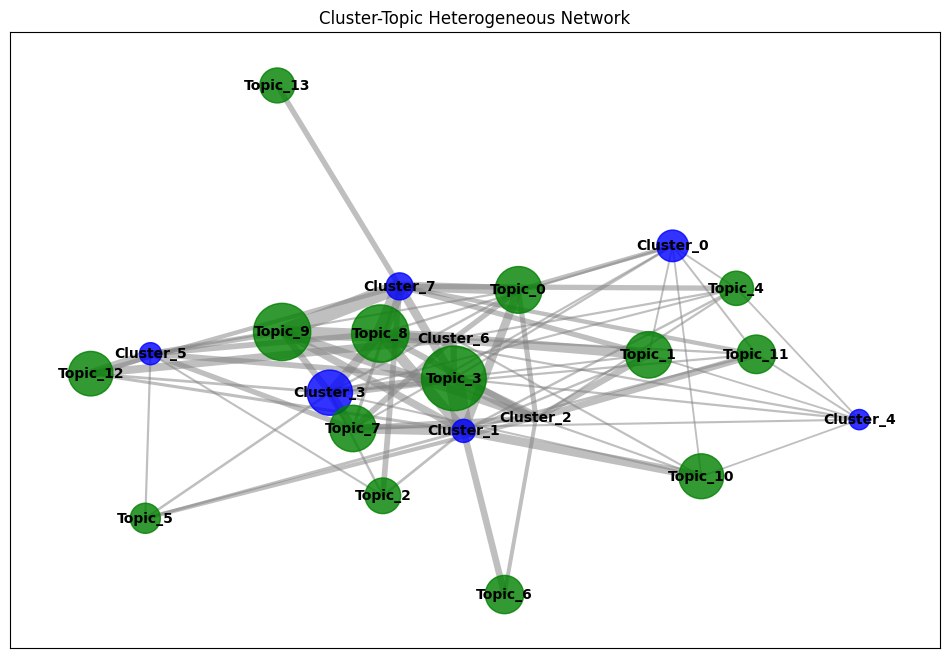

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()

for i in range(similarity_matrix.shape[0]):
    G.add_node(f'Cluster_{i}', size=similarity_matrix[i][i] * 8000, node_type='cluster')
for j in range(similarity_matrix.shape[1]):
    G.add_node(f'Topic_{j}', size=similarity_matrix[:, j].max() * 8000, node_type='topic')

for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        if similarity_matrix[i][j] > 0.01:
            G.add_edge(f'Cluster_{i}', f'Topic_{j}', weight=similarity_matrix[i][j])

node_sizes = [G.nodes[node]['size'] for node in G.nodes]
node_colors = ['blue' if G.nodes[node]['node_type'] == 'cluster' else 'green' for node in G.nodes]
edge_widths = [G[u][v]['weight'] * 50 for u, v in G.edges]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Cluster-Topic Heterogeneous Network")
plt.show()

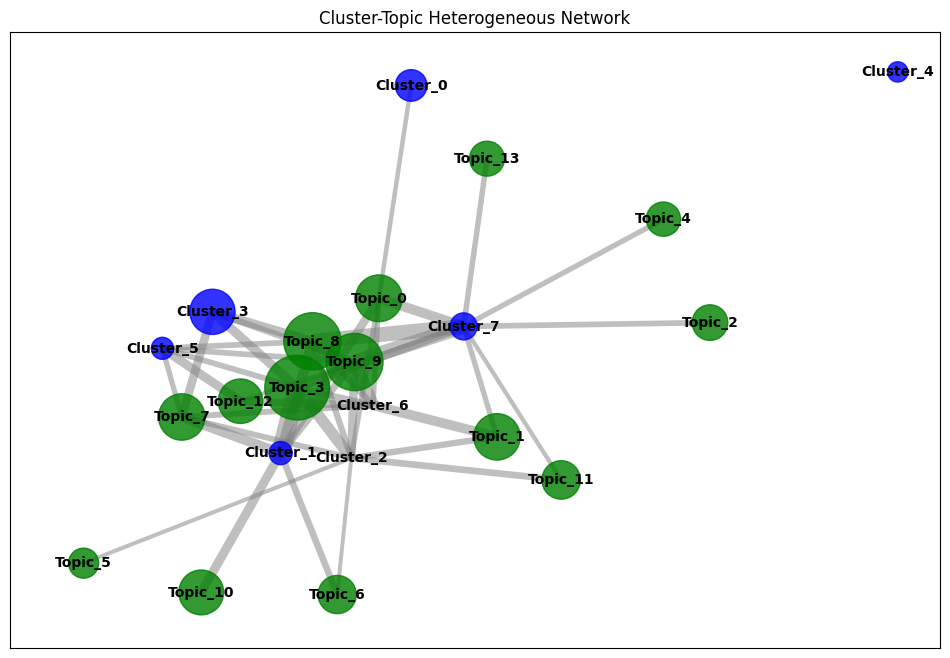

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()

for i in range(similarity_matrix.shape[0]):
    G.add_node(f'Cluster_{i}', size=similarity_matrix[i][i] * 8000, node_type='cluster')
for j in range(similarity_matrix.shape[1]):
    G.add_node(f'Topic_{j}', size=similarity_matrix[:, j].max() * 8000, node_type='topic')

for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        if similarity_matrix[i][j] > 0.05:
            G.add_edge(f'Cluster_{i}', f'Topic_{j}', weight=similarity_matrix[i][j])

node_sizes = [G.nodes[node]['size'] for node in G.nodes]
node_colors = ['blue' if G.nodes[node]['node_type'] == 'cluster' else 'green' for node in G.nodes]
edge_widths = [G[u][v]['weight'] * 50 for u, v in G.edges]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Cluster-Topic Heterogeneous Network")
plt.show()

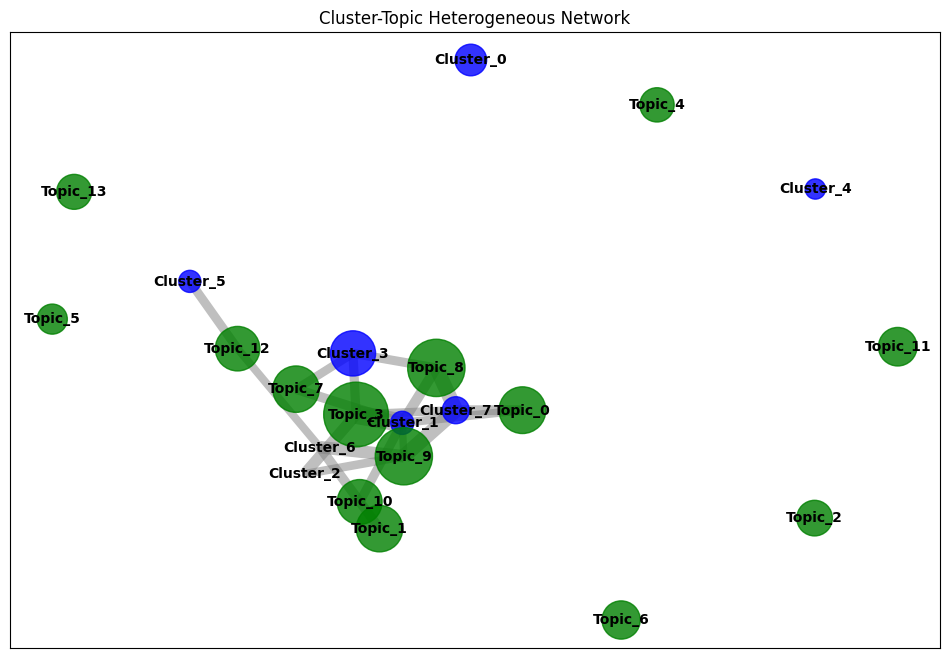

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.Graph()

for i in range(similarity_matrix.shape[0]):
    G.add_node(f'Cluster_{i}', size=similarity_matrix[i][i] * 8000, node_type='cluster')
for j in range(similarity_matrix.shape[1]):
    G.add_node(f'Topic_{j}', size=similarity_matrix[:, j].max() * 8000, node_type='topic')

for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        if similarity_matrix[i][j] > 0.1:
            G.add_edge(f'Cluster_{i}', f'Topic_{j}', weight=similarity_matrix[i][j])

node_sizes = [G.nodes[node]['size'] for node in G.nodes]
node_colors = ['blue' if G.nodes[node]['node_type'] == 'cluster' else 'green' for node in G.nodes]
edge_widths = [G[u][v]['weight'] * 50 for u, v in G.edges]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Cluster-Topic Heterogeneous Network")
plt.show()

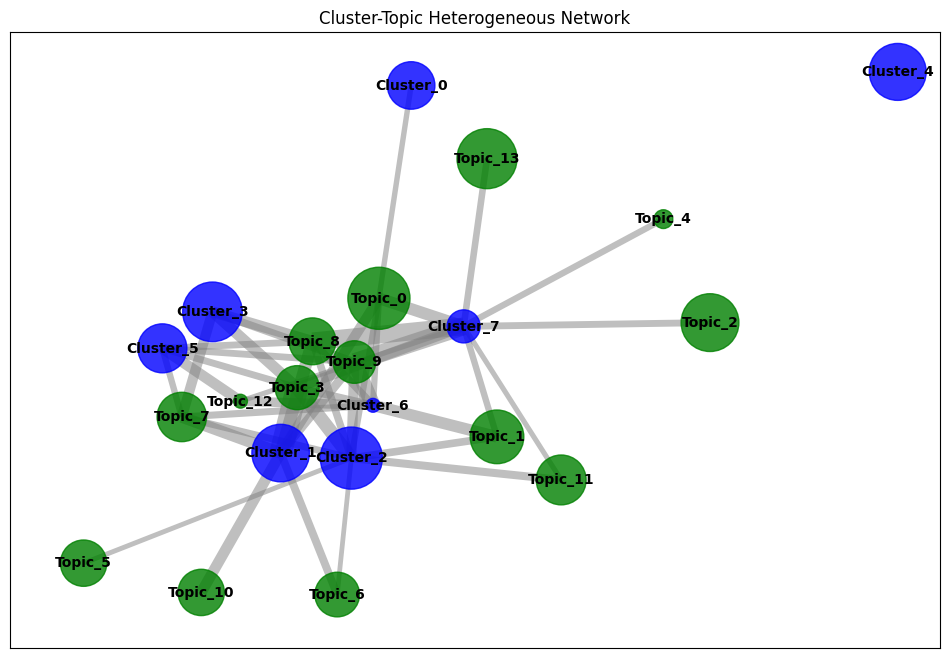

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

patent_cluster_scores = {0: 0.278754, 1: 0.306699, 2: 0.321152, 3: 0.313098, 4: 0.304844, 5: 0.282546, 6: 0.223950, 7: 0.247878}
review_topic_sentiments = {0: 0.92581, 1: 0.8943,  2: 0.90916, 3: 0.86387, 4: 0.81259, 5: 0.87062, 6: 0.86563, 7: 0.88003, 8: 0.87218, 9: 0.85974, 10: 0.87058, 11: 0.88159, 12: 0.80742, 13: 0.91754}
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def min_max_scaling(value, old_min, old_max, new_min, new_max):
    return ((value - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

cluster_min = min(patent_cluster_scores.values())
cluster_max = max(patent_cluster_scores.values())

sentiment_min = min(review_topic_sentiments.values())
sentiment_max = max(review_topic_sentiments.values())

min_size = 100
max_size = 2000

G = nx.Graph()

for i in range(similarity_matrix.shape[0]):
    scaled_size = min_max_scaling(patent_cluster_scores[i],
                                cluster_min, cluster_max,
                                min_size, max_size)
    G.add_node(f'Cluster_{i}', size=scaled_size, node_type='cluster')

for j in range(similarity_matrix.shape[1]):
    scaled_size = min_max_scaling(review_topic_sentiments[j],
                                sentiment_min, sentiment_max,
                                min_size, max_size)
    G.add_node(f'Topic_{j}', size=scaled_size, node_type='topic')


for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        if similarity_matrix[i][j] > 0.05:
            G.add_edge(f'Cluster_{i}', f'Topic_{j}', weight=similarity_matrix[i][j])

node_sizes = [G.nodes[node]['size'] for node in G.nodes]
node_colors = ['blue' if G.nodes[node]['node_type'] == 'cluster' else 'green' for node in G.nodes]
edge_widths = [G[u][v]['weight'] * 60 for u, v in G.edges]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color="gray", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

plt.title("Cluster-Topic Heterogeneous Network")
plt.show()

##### 2) 키워드 분석

In [ ]:
review_token = []
for i in range(len(tokenized_review)):
   review_token.extend(tokenized_review[i])

review_token[:5]

['hyundai', 'ioniq', 'mark', 'turn', 'point']

In [ ]:
words_to_delete = ["\'s", "fe", "car", "hyundai", 'one', 'miles', 'ioniq', 'kona', 'i30n', 'maybe', "n\'t", 'like', 'santa', 'tucson', "get", 'ev', "--", 'would', 'drive', 'vw', "``", '2022', 'two', 'also',
              'even', 'i20n', 'rn22e', 'cars', "\'\'", 'much', 'say', 'go', 'tesla', 'better', '..', 'i30', 'electric', 'take', 'make', 'every', 'around', 'come', 'work', 'lot', 'look', 'vehicle',
              'something', 'new', 'buy', 'new', 'really', 'love', 'well', 'come', 'need','little', 'give', 'think', 'everything', 'see', 'second', 'first', 'nexo', 'evs', '2024', 'happier',
              'help', 'point', 'feature', 'standard', 'system', 'model', 'i10', 'hybrid', 'still', 'include', 'put', 'rival', '2023', 'feel', 'never', 'rear', 'front', 'many', 'ioniq5', 'use', 'back',
              'part', 'want', 'truck', 'way', 'offer', 'pickup', 'know', 'range', 'issue', 'problem', 'zero', 'rodgers', 'yes', 'seem', 'different', 'unit', 'easy', 'less', 'hear', 'deal',
              'dealer', 'degrees', 'top', 'months', 'suv', '-the', 'assist', 'bring', 'gt', 'base', 'another', 'longer', 'i20', 'fiesta', 'bite', 'life', 'cent', 'far', 'hydrogen', 'fcv',
              'tell', 'van', 'staria', 'uk', 'keep', 'kia', 'brand', 'good', 'best', 'estimate', 'per', 'three', 'almost', 'purchase', 'sel', 'hope', 'pony', 'epiq', 'park', 'plus', 'available',
              'ev6', 'long', 'high', 'test', 'full', 'limit', "\'re", 'amaze', 'years', 'combination', 'sport', 'right', 'people', 'year', 'update', '2019', 'former', 'sort', 'maverick', 'order', 'ford', 'city',
              'try', 'epa', 'without', 'things', 'number', 'enough', 'pretty', 'may', 'ionic', 'though', '...', 'indeed', 'level', 'se', 'close', 'least', '2021', 'replace', 'leaf', 'days',
              'i40', 'versions', '300', 'world', 'via', 'anything', 'free', 'please', 'ride', 'jenni', 'day', 'pay', 'behind', 'motor', 'side', 'decent', 'n-line', '8.0', 'winter', 'expect', 'review', 'us', 'sell',
              'could', 'fix', 'tech', 'support', 'let', 'find', 'communicate', 'effective', 'worry', 'money', 'version', 'claim', 'technology', 'ever', 'pull', 'extra', "\'m", 'learn', 'wrong', 'fill', 'reason',
              'koera', 'status', 'flaw', 'wait', 'rev', 'bayon', 'build', 'mean', 'mode', 'diesel', 'market', 'fact', 'major', 'specs', 'mile', 'show', 'choice', 'average', 'techniq', 'live', 'set', 'kmph', 'spec',
              'sound+', 'low', 'pair', 'hit', 'touch', 'week', "\'ve", 'since', 'dealership', '40a', '1.6-litre', 'road', 'ensure', 'allow', 'mini-mpv', 'start', 'course', 'yet', 'thing', 'inside', 'provide', 'actually',
              'launch', 'previous', 'cold', 'hot', '8.5', 'repair', 'change', 'six-speed', 'seven-speed', 'elite', 'value', 'view', 'lower', 'extend', 'weather', 'concern', 'plenty', 'rid', 'haul', 'follow', 'save', 'total',
              'class', 'audi', 'smaller', 'cargo', 'rat', 'quite', 'leave', 'km', 'although', 'whole', 'ultimate', 'buyers', 'end', 'amperage', 'variants', 'nothing', 'bother', 'compare', 'several', 'contrast', 'able', 'real',
              'computer', 'bmw', 'anxiety', 'pack', 'proper', 'i800', 'plan', 'enjoy', 'complete', 'import', 'away', 'sit', 'four', 'instead', 'track', 'bin', 'underneath', 'firm', 'fit', 'eye', 'always', 'open',
              'except', 'overall', 'bolt', 'chevy', 'wife', 'i-pedal', 'default', 'sure', 'division', 'fall', 'easily', '258', 'become', 'genesis', 'roll', 'current', 'nissan', 'thank', 'call', 'continue', 'public',
              'mondeo', 'visit', 'korea', 'seven', 'discovery', 'finally', 'super', 'multilink', 'clean', '7500', 'rather', 'canada', 'already', 'hours', '8k', 'regret', 'luxury', 'mercedes', 'lifetime', 'msrp',
              'move', 'run', 'add', 'lead', 'lease', 'perk', 'reduce', 'credit', 'pant', 'mi', 'head', 'options', 'seriously', 'con', 'strange', 'require', '12v', 'die', 'bad', 'unlike', 'port', 'either', 'grown-up',
              '64kwh', 'might', 'ahead', 'convince', 'recall', '50', 'remain', 'turn']

token = list(filter(lambda word: word not in words_to_delete, review_token))

In [ ]:
token[:3]

['mark', 'korean', 'performance']

In [ ]:
from collections import Counter

token_counter = Counter(token)

new_wordInfo = dict()
print("\n--Token : Freq--")
for tags, counts in token_counter.most_common(50):
    new_wordInfo[tags] = counts
    print("%6s : %d" % (tags, counts))


--Token : Freq--
  seat : 307
charge : 284
battery : 220
 power : 155
 wheel : 145
control : 133
 price : 126
 steer : 126
  time : 124
driver : 121
 brake : 121
 great : 109
interior : 101
comfortable : 98
 space : 96
safety : 95
 speed : 87
performance : 80
  trim : 80
  lane : 78
  heat : 76
 light : 76
 small : 75
   fun : 73
design : 68
 sound : 67
 cabin : 66
  cost : 64
handle : 61
charger : 60
 style : 60
  warn : 59
  fast : 56
  auto : 56
screen : 55
infotainment : 53
cruise : 52
experience : 52
display : 51
   big : 50
acceleration : 49
engine : 48
service : 47
 hatch : 46
console : 46
button : 46
premium : 46
station : 45
  spot : 44
  home : 44


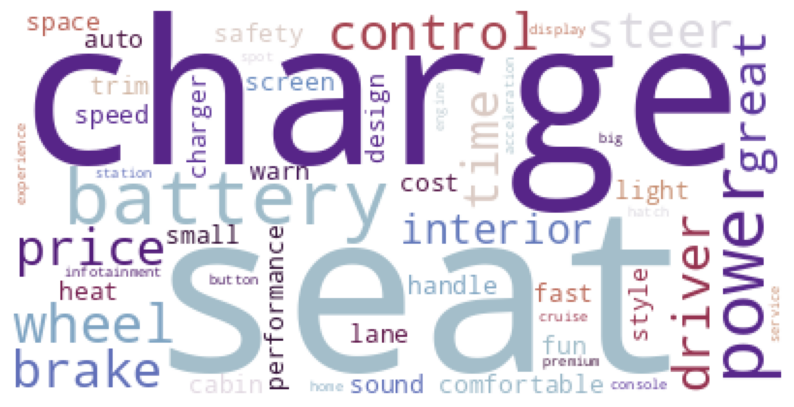

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(relative_scaling = 0.2,
                      background_color='white',
                      colormap="twilight"
                      ).generate_from_frequencies(new_wordInfo)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("before_gpt_wordcloud.png")
plt.show()

##### 3) 텍스트 연관 분석(네트워크 분석)

##### 4) 감성분석

##### VADER

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       203 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [ ]:
review.head(3)

,0
0,The Hyundai IONIQ 5 N marks a turning point fo...
1,"Any car-maker can produce a fast EV, but the s..."
2,How much does the Hyundai Kona Electric cost?\...


In [ ]:
review.columns

Index([0], dtype='int64')

In [ ]:
review.rename(columns={review.columns[0]: 'txt'}, inplace=True)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

sia = SentimentIntensityAnalyzer()

def sentiment_category(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

review['compound'] = review['txt'].apply(lambda x: sia.polarity_scores(x)['compound'])
review['sentiment'] = review['compound'].apply(sentiment_category)

print(review)

print(review['sentiment'].value_counts())

average_sentiment = review['compound'].mean()
print(f"Average Sentiment Score: {average_sentiment}")

                                                   txt  compound sentiment
0    The Hyundai IONIQ 5 N marks a turning point fo...    0.9996  Positive
1    Any car-maker can produce a fast EV, but the s...    0.9995  Positive
2    How much does the Hyundai Kona Electric cost?\...    0.9951  Positive
3    The Hyundai IONIQ 5 EV has been a huge success...    0.9997  Positive
4    The Hyundai IONIQ 6 is the second model from t...    0.9997  Positive
..                                                 ...       ...       ...
198  Hyundai, as usual, gives you a lot for your mo...    0.5256  Positive
199  confortable and sleek lines, my concern is tha...    0.0000   Neutral
200  This car. Man I love this car.  I really love ...    0.9956  Positive
201  Bought the car in early December - sight unsee...    0.9665  Positive
202  We got ionic 5 with great hope, but the batter...    0.1823  Positive

[203 rows x 3 columns]
sentiment
Positive    172
Negative     27
Neutral       4
Name: count, dtype

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   txt        203 non-null    object 
 1   compound   203 non-null    float64
 2   sentiment  203 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.9+ KB


In [ ]:
# 키워드 분석 결과 상위 15개 단어
keywords = ['seat', 'charge', 'battery', 'power', 'wheel', 'control', 'price', 'steer', 'time', 'driver', 'brake', 'interior', 'safety', 'speed', 'performance']

results = {}
for keyword in keywords:
    keyword_reviews = review[review['txt'].str.contains(keyword, case=False)]
    avg_sentiment = keyword_reviews['compound'].mean()
    results[keyword] = avg_sentiment

print("기능별 평균 감성 점수:")
for keyword, avg_sentiment in results.items():
    print(f"{keyword}: {avg_sentiment}")

기능별 평균 감성 점수:
seat: 0.8841440476190476
charge: 0.8062100000000001
battery: 0.6475507246376812
power: 0.8989153846153846
wheel: 0.8830830769230769
control: 0.922713043478261
price: 0.9188775862068965
steer: 0.878
time: 0.7370189873417722
driver: 0.8416279999999999
brake: 0.8313470588235294
interior: 0.9352944444444444
safety: 0.9207588235294117
speed: 0.9147000000000001
performance: 0.8875258064516129


In [ ]:
pd.DataFrame(results.items())[1]

0     0.884144
1     0.806210
2     0.647551
3     0.898915
4     0.883083
5     0.922713
6     0.918878
7     0.878000
8     0.737019
9     0.841628
10    0.831347
11    0.935294
12    0.920759
13    0.914700
14    0.887526
Name: 1, dtype: float64

In [ ]:
top_keyword_15 = pd.DataFrame(results.items()).sort_values(by=1, ascending=False)
top_keyword_15.head(3)

,0,1
11,interior,0.935294
5,control,0.922713
12,safety,0.920759


##### 감성 점수 부여 후 키워드 분석 결과의 상위 15개 단어에 대한 평균 감성 점수 확인

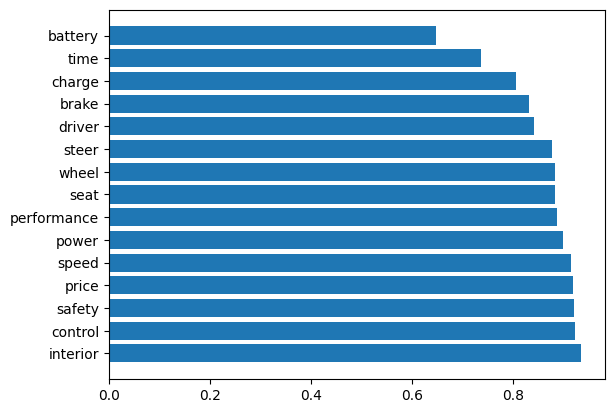

In [ ]:
import matplotlib.pyplot as plt
plt.barh(top_keyword_15[0], top_keyword_15[1])
plt.show()

##### 감성 분석 후 긍정, 부정, 중립 각각에 대하여 키워드 분석

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# 긍정, 부정, 중립 리뷰로 분류
positive_reviews = review[review['sentiment'] == 'Positive']['txt']
negative_reviews = review[review['sentiment'] == 'Negative']['txt']
neutral_reviews = review[review['sentiment'] == 'Neutral']['txt']

custom_stopwords = stopwords.words('english')
custom_stopwords.extend(["\'s", "fe", "car", "hyundai", 'one', 'miles', 'ioniq', 'kona', 'i30n', 'maybe', "n\'t", 'like', 'santa', 'tucson', "get", 'ev', "--", 'would', 'drive', 'vw', "``", '2022', 'two', 'also',
              'even', 'i20n', 'rn22e', 'cars', "\'\'", 'much', 'say', 'go', 'tesla', 'better', '..', 'i30', 'electric', 'take', 'make', 'every', 'around', 'come', 'work', 'lot', 'look', 'vehicle',
              'something', 'new', 'buy', 'new', 'really', 'love', 'well', 'come', 'need','little', 'give', 'think', 'everything', 'see', 'second', 'first', 'nexo', 'evs', '2024', 'happier',
              'help', 'point', 'feature', 'standard', 'system', 'model', 'i10', 'hybrid', 'still', 'include', 'put', 'rival', '2023', 'feel', 'never', 'rear', 'front', 'many', 'ioniq5', 'use', 'back',
              'part', 'want', 'truck', 'way', 'offer', 'pickup', 'know', 'range', 'issue', 'problem', 'zero', 'rodgers', 'yes', 'seem', 'different', 'unit', 'easy', 'less', 'hear', 'deal',
              'dealer', 'degrees', 'top', 'months', 'suv', '-the', 'assist', 'bring', 'gt', 'base', 'another', 'longer', 'i20', 'fiesta', 'bite', 'life', 'cent', 'far', 'hydrogen', 'fcv',
              'tell', 'van', 'staria', 'uk', 'keep', 'kia', 'brand', 'good', 'best', 'estimate', 'per', 'three', 'almost', 'purchase', 'sel', 'hope', 'pony', 'epiq', 'park', 'plus', 'available',
              'ev6', 'long', 'high', 'test', 'full', 'limit', "\'re", 'amaze', 'years', 'combination', 'sport', 'right', 'people', 'year', 'update', '2019', 'former', 'sort', 'maverick', 'order', 'ford', 'city',
              'try', 'epa', 'without', 'things', 'number', 'enough', 'pretty', 'may', 'ionic', 'though', '...', 'indeed', 'level', 'se', 'close', 'least', '2021', 'replace', 'leaf', 'days',
              'i40', 'versions', '300', 'world', 'via', 'anything', 'free', 'please', 'ride', 'jenni', 'day', 'pay', 'behind', 'motor', 'side', 'decent', 'n-line', '8.0', 'winter', 'expect', 'review', 'us', 'sell',
              'could', 'fix', 'tech', 'support', 'let', 'find', 'communicate', 'effective', 'worry', 'money', 'version', 'claim', 'technology', 'ever', 'pull', 'extra', "\'m", 'learn', 'wrong', 'fill', 'reason',
              'koera', 'status', 'flaw', 'wait', 'rev', 'bayon', 'build', 'mean', 'mode', 'diesel', 'market', 'fact', 'major', 'specs', 'mile', 'show', 'choice', 'average', 'techniq', 'live', 'set', 'kmph', 'spec',
              'sound+', 'low', 'pair', 'hit', 'touch', 'week', "\'ve", 'since', 'dealership', '40a', '1.6-litre', 'road', 'ensure', 'allow', 'mini-mpv', 'start', 'course', 'yet', 'thing', 'inside', 'provide', 'actually',
              'launch', 'previous', 'cold', 'hot', '8.5', 'repair', 'change', 'six-speed', 'seven-speed', 'elite', 'value', 'view', 'lower', 'extend', 'weather', 'concern', 'plenty', 'rid', 'haul', 'follow', 'save', 'total',
              'class', 'audi', 'smaller', 'cargo', 'rat', 'quite', 'leave', 'km', 'although', 'whole', 'ultimate', 'buyers', 'end', 'amperage', 'variants', 'nothing', 'bother', 'compare', 'several', 'contrast', 'able', 'real',
              'computer', 'bmw', 'anxiety', 'pack', 'proper', 'i800', 'plan', 'enjoy', 'complete', 'import', 'away', 'sit', 'four', 'instead', 'track', 'bin', 'underneath', 'firm', 'fit', 'eye', 'always', 'open',
              'except', 'overall', 'bolt', 'chevy', 'wife', 'i-pedal', 'default', 'sure', 'division', 'fall', 'easily', '258', 'become', 'genesis', 'roll', 'current', 'nissan', 'thank', 'call', 'continue', 'public',
              'mondeo', 'visit', 'korea', 'seven', 'discovery', 'finally', 'super', 'multilink', 'clean', '7500', 'rather', 'canada', 'already', 'hours', '8k', 'regret', 'luxury', 'mercedes', 'lifetime', 'msrp', 'confortable',
              'move', 'run', 'add', 'lead', 'lease', 'perk', 'reduce', 'credit', 'pant', 'mi', 'head', 'options', 'seriously', 'con', 'strange', 'require', '12v', 'die', 'bad', 'unlike', 'port', 'either', 'grown-up',
              '64kwh', 'might', 'ahead', 'convince', 'recall', '50', 'remain', 'turn', 'great', 'died', 'hits', 'levels', 'drove', 'preferred', 'found', 'features', 'within', 'charging', 'nice', 'towed', 'lines', 'time', 'sleek',
              'disappointed', 'driver', 'shop', 'slow', '25', 'ac', 'adults', 'affordable', 'cramped', 'certain', 'waiting', 'handles', 'seat', 'hoped', 'fun', 'comfortable', 'deceptive', 'decrease', 'draining', 'difficult',
              'expecting', 'fast', 'limited', 'saw', 'bit', 'person', 'expecting', 'smooth', 'ago', 'equivalent', 'refuses', 'fantastic', 'issues', 'ft', 'gas', 'conditions', 'clearance'])

def extract_avg_keywords(reviews, stopwords, num_keywords=10):
    vectorizer = TfidfVectorizer(stop_words=stopwords)
    tfidf_matrix = vectorizer.fit_transform(reviews)
    feature_names = vectorizer.get_feature_names_out()

    avg_tfidf_scores = tfidf_matrix.mean(axis=0).A1

    avg_keywords = {feature_names[i]: avg_tfidf_scores[i] for i in range(len(feature_names))}

    sorted_avg_keywords = sorted(avg_keywords.items(), key=lambda item: item[1], reverse=True)
    return sorted_avg_keywords[:num_keywords]

positive_keywords = extract_avg_keywords(positive_reviews, custom_stopwords)
negative_keywords = extract_avg_keywords(negative_reviews, custom_stopwords)
neutral_keywords = extract_avg_keywords(neutral_reviews, custom_stopwords)

print("긍정 리뷰 키워드:")
for keyword, score in positive_keywords:
    print(f"{keyword}: {score}")

print("\n부정 리뷰 키워드:")
for keyword, score in negative_keywords:
    print(f"{keyword}: {score}")

print("\n중립 리뷰 키워드:")
for keyword, score in neutral_keywords:
    print(f"{keyword}: {score}")

긍정 리뷰 키워드:
battery: 0.038549456734007025
driving: 0.03513243779969975
seats: 0.03208191713765424
safety: 0.026481884893107065
charge: 0.026083961504679957
power: 0.02466281435242084
space: 0.023269194957413843
interior: 0.022345425939795507
wheel: 0.0194513569362765
price: 0.018566785842479158

부정 리뷰 키워드:
battery: 0.09938350466563496
compartments: 0.054757405728403784
charge: 0.05430807031226234
acceleration: 0.05179693955360002
service: 0.04294773176651939
power: 0.033129760582571555
driving: 0.029387990965366137
beauty: 0.028786821544180476
warranty: 0.028215496133369655
charger: 0.02448261414311955

중립 리뷰 키워드:
price: 0.25
designed: 0.14433756729740643
hardware: 0.14433756729740643
software: 0.14433756729740643
battery: 0.0962250448649376
acceleration: 0.0481125224324688
driving: 0.0481125224324688
headroom: 0.0481125224324688
heat: 0.0481125224324688
interior: 0.0481125224324688


#### 2.2 특허 데이터 분석

##### 1) 토픽모델링

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import re
import nltk
nltk.download('punkt')

patents['abstract_token'] = patents['abstract'].astype('str').apply(lambda x: x.lower())

stop_words = stopwords.words('english')
patents['abstract_token'] = patents['abstract_token'].apply(lambda x: [word for word in x if word not in (stop)])

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
patents['abstract_token'] = patents['abstract_token'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

patents['abstract_token'] = patents['abstract'].apply(lambda row: nltk.word_tokenize(row))

patents['abstract_token'] = patents['abstract_token'].apply(lambda x: [word for word in x if len(word) > 2])

from string import punctuation
for p in punctuation :
  patents['abstract_token'] = patents['abstract_token'].replace(p, "")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
words_list = ["\'s", "fe", "car", "hyundai", 'one', 'miles', 'ioniq', 'kona', 'i30n', 'maybe', "n\'t", 'like', 'santa', 'tucson', "get", 'ev', "--", 'would', 'drive', 'vw', "``", '2022', 'two', 'also',
              'even', 'i20n', 'rn22e', 'cars', "\'\'", 'much', 'say', 'go', 'tesla', 'better', '..', 'i30', 'electric', 'take', 'make', 'every', 'around', 'come', 'work', 'lot', 'look', 'vehicle',
              'something', 'new', 'buy', 'new', 'really', 'great', 'love', 'well', 'come', 'need','little', 'give', 'think', 'everything', 'see', 'second', 'first', 'nexo', 'evs', '2024', 'happier',
              'help', 'point', 'feature', 'standard', 'system', 'model', 'i10', 'hybrid', 'still', 'include', 'put', 'rival', '2023', 'feel', 'never', 'rear', 'front', 'many', 'ioniq5', 'use', 'back',
              'part', 'want', 'truck', 'way', 'offer', 'pickup', 'know', 'range', 'issue', 'problem', 'zero', 'rodgers', 'yes', 'seem', 'perfect', 'different', 'unit', 'easy', 'less', 'hear', 'deal',
              'dealer', 'degrees', 'top', 'months', 'suv', '-the', 'assist', 'bring', 'gt', 'base', 'another', 'longer', 'i20', 'nice', 'fiesta', 'bite', 'life', 'cent', 'far', 'hydrogen', 'fcv',
              'tell', 'van', 'staria', 'uk', 'keep', 'kia', 'brand', 'good', 'best', 'estimate', 'per', 'three', 'almost', 'purchase', 'sel', 'hope', 'pony', 'epiq', 'park', 'plus', 'available',
              'ev6', 'long', 'high', 'test', 'full', 'limit', "\'re", 'amaze', 'years', 'combination', 'sport', 'right', 'people', 'year', 'update', '2019', 'former', 'sort', 'maverick', 'order', 'ford', 'city',
              'excellent', 'try', 'epa', 'without', 'things', 'number', 'enough', 'pretty', 'may', 'ionic', 'though', '...', 'indeed', 'level', 'se', 'close', 'least', '2021', 'replace', 'leaf', 'days', 'disappoint',
              'i40', 'versions', '300', 'world', 'via', 'anything', 'free', 'please', 'ride', 'jenni', 'day', 'pay', 'behind', 'motor', 'side', 'decent', 'n-line', '8.0', 'winter', 'expect', 'review', 'us', 'sell',
              'could', 'fix', 'tech', 'support', 'let', 'find', 'communicate', 'effective', 'worry', 'money', 'version', 'claim', 'technology', 'ever', 'pull', 'extra', "\'m", 'learn', 'wrong', 'fill', 'reason',
              'koera', 'status', 'flaw', 'wait', 'rev', 'bayon', 'build', 'mean', 'mode', 'diesel', 'market', 'fact', 'major', 'specs', 'mile', 'show', 'choice', 'average', 'techniq', 'live', 'set', 'kmph', 'spec',
              'sound+', 'low', 'pair', 'hit', 'touch', 'week', "\'ve", 'since', 'dealership', '40a', '1.6-litre', 'road', 'ensure', 'allow', 'mini-mpv', 'start', 'course', 'yet', 'thing', 'inside', 'provide', 'actually',
              'launch', 'previous', 'cold', 'hot', '8.5', 'repair', 'change', 'six-speed', 'seven-speed', 'elite', 'value', 'view', 'lower', 'extend', 'weather', 'concern', 'plenty', 'rid', 'haul', 'follow', 'save', 'total',
              'class', 'audi', 'smaller', 'cargo', 'rat', 'quite', 'leave', 'km', 'although', 'whole', 'ultimate', 'buyers', 'end', 'amperage', 'variants', 'nothing', 'bother', 'compare', 'several', 'contrast', 'able', 'real',
              'computer', 'bmw', 'anxiety', 'pack', 'proper', 'i800', 'plan', 'enjoy', 'complete', 'import', 'away', 'sit', 'four', 'instead', 'track', 'bin', 'underneath', 'firm', 'fit', 'eye', 'always', 'open',
              'except', 'overall', 'bolt', 'chevy', 'wife', 'i-pedal', 'default', 'sure', 'division', 'fall', 'easily', '258', 'become', 'genesis', 'roll', 'current', 'nissan', 'thank', 'call', 'continue', 'public',
              'mondeo', 'visit', 'korea', 'seven', 'discovery', 'finally', 'super', 'multilink', 'clean', '7500', 'rather', 'canada', 'already', 'hours', '8k', 'regret', 'luxury', 'mercedes', 'lifetime', 'msrp',
              'move', 'run', 'add', 'lead', 'lease', 'perk', 'reduce', 'credit', 'pant', 'mi', 'terrific', 'head', 'options', 'seriously', 'con', 'strange', 'require', '12v', 'die', 'bad', 'unlike', 'port', 'either', 'grown-up',
              'fresh', '64kwh', 'might', 'ahead', 'convince', 'recall', '50', 'remain', 'turn', 'the', 'and', 'for', 'more', 'provided', 'input', 'based', 'are', 'from', 'that', 'whether', 'includes', 'provided',
              'third', 'operating', 'when', 'shafts', 'configured', 'determined', 'determining', 'session', 'after-burn', 'control', 'line', 'core', 'connected', 'element', 'hev', 'information', 'selectively', 'soc', 'with',
              'shifting', 'agent', 'line', 'effect', 'virtual', 'which','module', 'inner', 'state', 'cells', 'case', 'cell', 'through', 'command', 'where', 'feeling', 'method', 'deicing', 'amount', 'fixedly', 'output', 'load',
              'target', 'controlling', 'characteristics', 'device', 'learning', 'charging', 'apparatus', 'rotating', 'braking', 'component', 'arm', 'member', 'regenerative', 'coolant', 'relay', 'internal', 'having', 'disposed', 'mounted',
              'condition', 'elements', 'main', 'thereof', 'satisfied', 'user', 'calculating', 'according', 'coaxially', 'fourth', 'recirculation', 'connectable', 'request', 'connecting', 'supply', 'detecting', 'traveling'
              'receiving', 'transmitted', 'fee', 'including', 'other', 'each', 'performing', 'during', 'perform', 'rotational', 'predetermined', 'characteristic', 'variable', 'torques', 'sets', 'intercept', 'determine', 'leisure', 'aps', 'interlock',
              'using', 'packs', 'receiving', 'intermediate', 'pulley', 'server', 'conditioning', 'catalyst', 'starting', 'sixth', 'section', 'zone', 'shifted','outputting', 'calculated', 'transferring', 'collected', 'instruction', 'processor',
              'locking', 'infrared', 'expected', 'required', 'controller', 'producing', 'opening', 'parts', 'object', 'performed', 'frequency', 'key', 'basis', 'contact', 'shift', 'gear', 'higher', 'authentication', 'generated', 'electronic',
              'exhaust', 'male', 'being', 'parallel', 'corresponding', 'fifth', 'fixed', 'corresponding', 'inlet', 'parallel', 'between', 'differential', 'operatively']
patents['abstract_token'] = patents['abstract_token'].apply(lambda x: [words for words in x if words not in (words_list)])

In [ ]:
#Coherence 및 Perplexity score 계산
import gensim
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    perplexity_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=patents['abstract_token'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perplexity_values

def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 20;
    start = 2;
    step = 2;

    model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)
    x = range(start, limit, step)

    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

    plt.plot(x, perplexity_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Perplexity score")
    plt.legend(("perplexity_values"), loc='best')
    plt.show()

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(patents['abstract_token'])
corpus = [dictionary.doc2bow(txt) for txt in patents['abstract_token']]

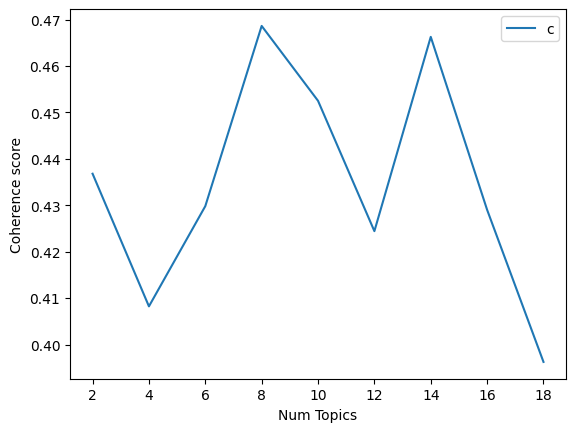

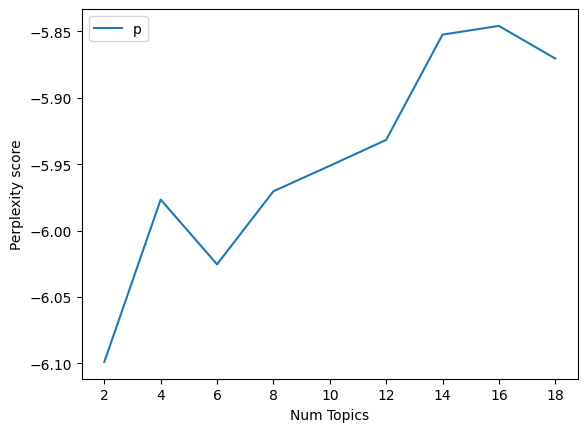

In [ ]:
find_optimal_number_of_topics(dictionary, corpus, patents['abstract_token'])

In [ ]:
#LDA 모델링
NUM_TOPICS = 6
ldamodel = gensim.models.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics()
for topic in topics:
  print(topic)

(0, '0.116*"torque" + 0.045*"engine" + 0.029*"driving" + 0.027*"air" + 0.018*"speed" + 0.017*"heating" + 0.015*"vibration" + 0.012*"operation" + 0.012*"clutch" + 0.010*"wheel"')
(1, '0.059*"driving" + 0.051*"engine" + 0.018*"clutch" + 0.014*"speed" + 0.013*"sound" + 0.010*"time" + 0.010*"combustion" + 0.009*"driver" + 0.009*"signal" + 0.009*"oil"')
(2, '0.177*"shaft" + 0.056*"power" + 0.038*"rotation" + 0.037*"engine" + 0.031*"transmission" + 0.031*"planetary" + 0.027*"torque" + 0.018*"clutch" + 0.012*"housing" + 0.010*"motor-generator"')
(3, '0.043*"engine" + 0.041*"fuel" + 0.020*"injection" + 0.019*"power" + 0.018*"speed" + 0.012*"driving" + 0.011*"water" + 0.011*"transmission" + 0.010*"signal" + 0.010*"sensing"')
(4, '0.079*"battery" + 0.023*"cooling" + 0.018*"charge" + 0.017*"driving" + 0.016*"voltage" + 0.011*"sound" + 0.011*"plurality" + 0.010*"signal" + 0.009*"management" + 0.008*"communication"')
(5, '0.046*"battery" + 0.031*"power" + 0.030*"charger" + 0.028*"speed" + 0.016*"co

##### 2) 키워드 분석

In [ ]:
review_token = []
for i in range(len(patents['abstract_token'])):
   review_token.extend(patents['abstract_token'][i])

token = list(filter(lambda word: word not in words_list, review_token))

from collections import Counter

token_counter = Counter(token)

new_wordInfo = dict()
print("\n--Token : Freq--")
for tags, counts in token_counter.most_common(50):
    new_wordInfo[tags] = counts
    print("%6s : %d" % (tags, counts))


--Token : Freq--
 shaft : 375
engine : 208
torque : 186
 power : 177
battery : 134
driving : 114
transmission : 93
rotation : 87
 speed : 72
planetary : 66
clutch : 66
plurality : 39
housing : 38
  fuel : 37
voltage : 35
cooling : 35
  time : 31
   air : 31
charge : 30
charger : 28
 rotor : 27
signal : 27
motor-generator : 26
vibration : 26
operation : 25
heating : 24
temperature : 22
 sound : 22
connector : 20
 wheel : 19
communication : 17
respectively : 17
distance : 17
combustion : 17
  body : 17
portion : 16
 final : 16
 brake : 16
injection : 16
sensing : 16
sensor : 15
driver : 15
motor/generator : 14
driven : 14
 while : 14
circuit : 14
determines : 14
externally : 13
wireless : 13
reference : 13


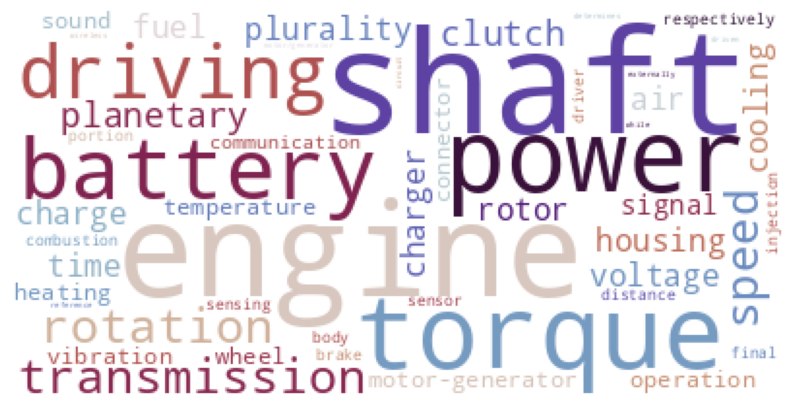

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(relative_scaling = 0.2,
                      background_color='white',
                      colormap="twilight"
                      ).generate_from_frequencies(new_wordInfo)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("before_gpt_wordcloud.png")
plt.show()

##### 3) 특허 군집화

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

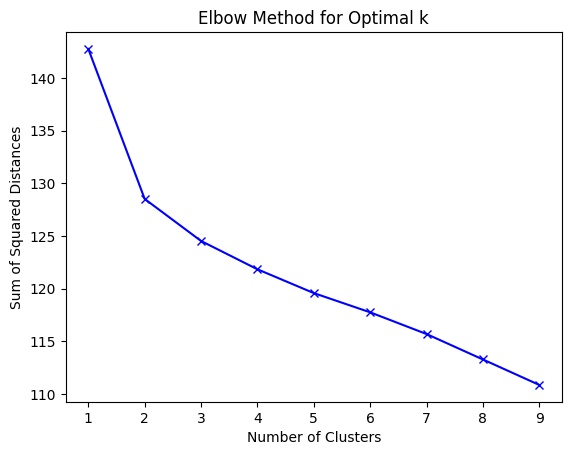

                                                 title  cluster
0    Power transmission apparatus for hybrid electr...        0
1    Charging cable system for an electric vehicle,...        2
2    Power transmission apparatus of hybrid electri...        0
3    Power transmission apparatus of hybrid electri...        0
4    Apparatus and method for providing charging in...        2
..                                                 ...      ...
169  Hybrid electric vehicle and touchpoint learnin...        0
170   Power transmission apparatus of electric vehicle        0
171  Power transmission apparatus of hybrid electri...        0
172                       Reducer for electric vehicle        0
173        Electric vehicle and control method thereof        1

[174 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(patents['abstract'])

lsa = TruncatedSVD(n_components=100, random_state=42)
tfidf_matrix_lsa = lsa.fit_transform(tfidf_matrix)

sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix_lsa)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal_num_clusters = 3

kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(tfidf_matrix_lsa)

patents['cluster'] = kmeans.labels_
print(patents[['title', 'cluster']])

In [ ]:
patents['cluster'].nunique()

3

In [ ]:
stop_words = stopwords.words('english')
words_list = ["\'s", "fe", "car", "hyundai", 'one', 'miles', 'ioniq', 'kona', 'i30n', 'maybe', "n\'t", 'like', 'santa', 'tucson', "get", 'ev', "--", 'would', 'drive', 'vw', "``", '2022', 'two', 'also',
              'even', 'i20n', 'rn22e', 'cars', "\'\'", 'much', 'say', 'go', 'tesla', 'better', '..', 'i30', 'electric', 'take', 'make', 'every', 'around', 'come', 'work', 'lot', 'look', 'vehicle',
              'something', 'new', 'buy', 'new', 'really', 'great', 'love', 'well', 'come', 'need','little', 'give', 'think', 'everything', 'see', 'second', 'first', 'nexo', 'evs', '2024', 'happier',
              'help', 'point', 'feature', 'standard', 'system', 'model', 'i10', 'hybrid', 'still', 'include', 'put', 'rival', '2023', 'feel', 'never', 'rear', 'front', 'many', 'ioniq5', 'use', 'back',
              'part', 'want', 'truck', 'way', 'offer', 'pickup', 'know', 'range', 'issue', 'problem', 'zero', 'rodgers', 'yes', 'seem', 'perfect', 'different', 'unit', 'easy', 'less', 'hear', 'deal',
              'dealer', 'degrees', 'top', 'months', 'suv', '-the', 'assist', 'bring', 'gt', 'base', 'another', 'longer', 'i20', 'nice', 'fiesta', 'bite', 'life', 'cent', 'far', 'hydrogen', 'fcv',
              'tell', 'van', 'staria', 'uk', 'keep', 'kia', 'brand', 'good', 'best', 'estimate', 'per', 'three', 'almost', 'purchase', 'sel', 'hope', 'pony', 'epiq', 'park', 'plus', 'available',
              'ev6', 'long', 'high', 'test', 'full', 'limit', "\'re", 'amaze', 'years', 'combination', 'sport', 'right', 'people', 'year', 'update', '2019', 'former', 'sort', 'maverick', 'order', 'ford', 'city',
              'excellent', 'try', 'epa', 'without', 'things', 'number', 'enough', 'pretty', 'may', 'ionic', 'though', '...', 'indeed', 'level', 'se', 'close', 'least', '2021', 'replace', 'leaf', 'days', 'disappoint',
              'i40', 'versions', '300', 'world', 'via', 'anything', 'free', 'please', 'ride', 'jenni', 'day', 'pay', 'behind', 'motor', 'side', 'decent', 'n-line', '8.0', 'winter', 'expect', 'review', 'us', 'sell',
              'could', 'fix', 'tech', 'support', 'let', 'find', 'communicate', 'effective', 'worry', 'money', 'version', 'claim', 'technology', 'ever', 'pull', 'extra', "\'m", 'learn', 'wrong', 'fill', 'reason',
              'koera', 'status', 'flaw', 'wait', 'rev', 'bayon', 'build', 'mean', 'mode', 'diesel', 'market', 'fact', 'major', 'specs', 'mile', 'show', 'choice', 'average', 'techniq', 'live', 'set', 'kmph', 'spec',
              'sound+', 'low', 'pair', 'hit', 'touch', 'week', "\'ve", 'since', 'dealership', '40a', '1.6-litre', 'road', 'ensure', 'allow', 'mini-mpv', 'start', 'course', 'yet', 'thing', 'inside', 'provide', 'actually',
              'launch', 'previous', 'cold', 'hot', '8.5', 'repair', 'change', 'six-speed', 'seven-speed', 'elite', 'value', 'view', 'lower', 'extend', 'weather', 'concern', 'plenty', 'rid', 'haul', 'follow', 'save', 'total',
              'class', 'audi', 'smaller', 'cargo', 'rat', 'quite', 'leave', 'km', 'although', 'whole', 'ultimate', 'buyers', 'end', 'amperage', 'variants', 'nothing', 'bother', 'compare', 'several', 'contrast', 'able', 'real',
              'computer', 'bmw', 'anxiety', 'pack', 'proper', 'i800', 'plan', 'enjoy', 'complete', 'import', 'away', 'sit', 'four', 'instead', 'track', 'bin', 'underneath', 'firm', 'fit', 'eye', 'always', 'open',
              'except', 'overall', 'bolt', 'chevy', 'wife', 'i-pedal', 'default', 'sure', 'division', 'fall', 'easily', '258', 'become', 'genesis', 'roll', 'current', 'nissan', 'thank', 'call', 'continue', 'public',
              'mondeo', 'visit', 'korea', 'seven', 'discovery', 'finally', 'super', 'multilink', 'clean', '7500', 'rather', 'canada', 'already', 'hours', '8k', 'regret', 'luxury', 'mercedes', 'lifetime', 'msrp',
              'move', 'run', 'add', 'lead', 'lease', 'perk', 'reduce', 'credit', 'pant', 'mi', 'terrific', 'head', 'options', 'seriously', 'con', 'strange', 'require', '12v', 'die', 'bad', 'unlike', 'port', 'either', 'grown-up',
              'fresh', '64kwh', 'might', 'ahead', 'convince', 'recall', '50', 'remain', 'turn', 'the', 'and', 'for', 'more', 'provided', 'input', 'based', 'are', 'from', 'that', 'whether', 'includes', 'provided',
              'third', 'operating', 'when', 'shafts', 'configured', 'determined', 'determining', 'session', 'after-burn', 'control', 'line', 'core', 'connected', 'element', 'hev', 'information', 'selectively', 'soc', 'with',
              'shifting', 'agent', 'line', 'effect', 'virtual', 'which','module', 'inner', 'state', 'cells', 'case', 'cell', 'through', 'command', 'where', 'feeling', 'method', 'deicing', 'amount', 'fixedly', 'output', 'load',
              'target', 'controlling', 'characteristics', 'device', 'learning', 'charging', 'apparatus', 'rotating', 'braking', 'component', 'arm', 'member', 'regenerative', 'coolant', 'relay', 'internal', 'having', 'disposed', 'mounted',
              'condition', 'elements', 'main', 'thereof', 'satisfied', 'user', 'calculating', 'according', 'coaxially', 'fourth', 'recirculation', 'connectable', 'request', 'connecting', 'supply', 'detecting', 'traveling'
              'receiving', 'transmitted', 'fee', 'including', 'other', 'each', 'performing', 'during', 'perform', 'rotational', 'predetermined', 'characteristic', 'variable', 'torques', 'sets', 'intercept', 'determine', 'leisure', 'aps', 'interlock',
              'using', 'packs', 'receiving', 'intermediate', 'pulley', 'server', 'conditioning', 'catalyst', 'starting', 'sixth', 'section', 'zone', 'shifted','outputting', 'calculated', 'transferring', 'collected', 'instruction', 'processor',
              'locking', 'infrared', 'expected', 'required', 'controller', 'producing', 'opening', 'parts', 'object', 'performed', 'frequency', 'key', 'basis', 'contact', 'shift', 'gear', 'higher', 'authentication', 'generated', 'electronic',
              'exhaust', 'male', 'being', 'parallel', 'corresponding', 'fifth', 'fixed', 'corresponding', 'inlet', 'parallel', 'between', 'differential', 'operatively', 'supplying', 'externally']
stop_words.extend(words_list)

cluster_keywords = {}
for cluster_id in range(optimal_num_clusters):
    cluster_patents = patents[patents['cluster'] == cluster_id]
    cluster_abstracts = cluster_patents['abstract']
    cluster_tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=stop_words)
    cluster_tfidf_matrix = cluster_tfidf_vectorizer.fit_transform(cluster_abstracts)
    feature_names = cluster_tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = cluster_tfidf_matrix.sum(axis=0).A1
    keywords = [feature_names[i] for i in tfidf_scores.argsort()[-10:][::-1]]
    cluster_keywords[cluster_id] = keywords

for cluster_id, keywords in cluster_keywords.items():
    print(f"클러스터 {cluster_id}의 주요 토픽:")
    print(keywords)

클러스터 0의 주요 토픽:
['rotation', 'engine', 'torque', 'generator', 'housing', 'clutch', 'rotor', 'among', 'plurality', 'meshed']
클러스터 1의 주요 토픽:
['engine', 'torque', 'driving', 'speed', 'clutch', 'power', 'transmission', 'wheel', 'time', 'sound']
클러스터 2의 주요 토픽:
['battery', 'power', 'charge', 'voltage', 'fuel', 'charger', 'cooling', 'air', 'heating', 'connector']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['burn', 'grown', 'litre', 'mini', 'mpv', 'pedal', 'six', 'sound', 'speed'] not in stop_words.
  warnings.warn(


In [ ]:
patents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   publication number  174 non-null    object
 1   title               174 non-null    object
 2   abstract            174 non-null    object
 3   cpc                 172 non-null    object
 4   filed date          174 non-null    object
 5   cite                174 non-null    int64 
 6   abstract_clean      174 non-null    object
 7   abstract_token      174 non-null    object
 8   cluster             174 non-null    int32 
dtypes: int32(1), int64(1), object(7)
memory usage: 11.7+ KB


#### 2.3 리뷰 데이터와 특허 데이터 상관분석

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

patents_texts = patents['title'].fillna('') + " " + patents['abstract'].fillna('')
reviews_texts = review['txt'].fillna('')

vectorizer = TfidfVectorizer(stop_words=stop_words)
patents_tfidf = vectorizer.fit_transform(patents_texts)
reviews_tfidf = vectorizer.transform(reviews_texts)

cosine_similarities = cosine_similarity(patents_tfidf, reviews_tfidf)

# 유사도가 0.6 이상인 경우만 필터링하여 출력
threshold = 0.6
filtered_similarities = []

print("Patents and reviews with cosine similarity >= 0.6:")
for i, similarities in enumerate(cosine_similarities):
    for j, similarity in enumerate(similarities):
        if similarity >= threshold:
            filtered_similarities.append((i, j, similarity))
            print(f"Patent {i} and Review {j}: {similarity:.4f}")

Patents and reviews with cosine similarity >= 0.6:
Patent 15 and Review 131: 0.6526
Patent 112 and Review 75: 0.7065
Patent 112 and Review 83: 0.7065
Patent 112 and Review 116: 0.7065
Patent 123 and Review 75: 0.6123
Patent 123 and Review 83: 0.6123
Patent 123 and Review 116: 0.6123
Patent 124 and Review 75: 0.6176
Patent 124 and Review 83: 0.6176
Patent 124 and Review 116: 0.6176
Patent 138 and Review 195: 0.6926


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['burn', 'grown', 'litre', 'mini', 'mpv', 'pedal', 'six', 'sound', 'speed'] not in stop_words.
  warnings.warn(


In [ ]:
filtered_df = pd.DataFrame(filtered_similarities, columns=['Patent Index', 'Review Index', 'Cosine Similarity'])
filtered_df.sort_values(by='Cosine Similarity', ascending=False)

,Patent Index,Review Index,Cosine Similarity
1,112,75,0.706550
2,112,83,0.706550
3,112,116,0.706550
10,138,195,0.692592
0,15,131,0.652623
7,124,75,0.617588
8,124,83,0.617588
9,124,116,0.617588
4,123,75,0.612317
5,123,83,0.612317


In [ ]:
review.iloc[75]['sentiment']

txt          Great car now that battery issue resolved, end...
sentiment                                             Positive
compound                                                0.7003
Name: 75, dtype: object

In [ ]:
filtered_df['Review Index'].sort_values()

1      75
4      75
7      75
2      83
5      83
8      83
3     116
6     116
9     116
0     131
10    195
Name: Review Index, dtype: int64

In [ ]:
for i in filtered_df['Review Index'].sort_values():
  print(i, review.iloc[i]['sentiment'])

75 Positive
75 Positive
75 Positive
83 Negative
83 Negative
83 Negative
116 Negative
116 Negative
116 Negative
131 Negative
195 Negative


In [ ]:
filtered_df['sentiment'] = ['Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative']
filtered_df.sort_values(by='Cosine Similarity', ascending=False)

,Patent Index,Review Index,Cosine Similarity,sentiment
1,112,75,0.706550,Positive
2,112,83,0.706550,Negative
3,112,116,0.706550,Negative
10,138,195,0.692592,Negative
0,15,131,0.652623,Negative
7,124,75,0.617588,Positive
8,124,83,0.617588,Negative
9,124,116,0.617588,Negative
4,123,75,0.612317,Positive
5,123,83,0.612317,Negative


In [ ]:
stop_words = stopwords.words('english')
words_list = ["\'s", "fe", "car", "hyundai", 'one', 'miles', 'ioniq', 'kona', 'i30n', 'maybe', "n\'t", 'like', 'santa', 'tucson', "get", 'ev', "--", 'would', 'drive', 'vw', "``", '2022', 'two', 'also',
              'even', 'i20n', 'rn22e', 'cars', "\'\'", 'much', 'say', 'go', 'tesla', 'better', '..', 'i30', 'electric', 'take', 'make', 'every', 'around', 'come', 'work', 'lot', 'look', 'vehicle',
              'something', 'new', 'buy', 'new', 'really', 'great', 'love', 'well', 'come', 'need','little', 'give', 'think', 'everything', 'see', 'second', 'first', 'nexo', 'evs', '2024', 'happier',
              'help', 'point', 'feature', 'standard', 'system', 'model', 'i10', 'hybrid', 'still', 'include', 'put', 'rival', '2023', 'feel', 'never', 'rear', 'front', 'many', 'ioniq5', 'use', 'back',
              'part', 'want', 'truck', 'way', 'offer', 'pickup', 'know', 'range', 'issue', 'problem', 'zero', 'rodgers', 'yes', 'seem', 'perfect', 'different', 'unit', 'easy', 'less', 'hear', 'deal',
              'dealer', 'degrees', 'top', 'months', 'suv', '-the', 'assist', 'bring', 'gt', 'base', 'another', 'longer', 'i20', 'nice', 'fiesta', 'bite', 'life', 'cent', 'far', 'hydrogen', 'fcv',
              'tell', 'van', 'staria', 'uk', 'keep', 'kia', 'brand', 'good', 'best', 'estimate', 'per', 'three', 'almost', 'purchase', 'sel', 'hope', 'pony', 'epiq', 'park', 'plus', 'available',
              'ev6', 'long', 'high', 'test', 'full', 'limit', "\'re", 'amaze', 'years', 'combination', 'sport', 'right', 'people', 'year', 'update', '2019', 'former', 'sort', 'maverick', 'order', 'ford', 'city',
              'excellent', 'try', 'epa', 'without', 'things', 'number', 'enough', 'pretty', 'may', 'ionic', 'though', '...', 'indeed', 'level', 'se', 'close', 'least', '2021', 'replace', 'leaf', 'days', 'disappoint',
              'i40', 'versions', '300', 'world', 'via', 'anything', 'free', 'please', 'ride', 'jenni', 'day', 'pay', 'behind', 'motor', 'side', 'decent', 'n-line', '8.0', 'winter', 'expect', 'review', 'us', 'sell',
              'could', 'fix', 'tech', 'support', 'let', 'find', 'communicate', 'effective', 'worry', 'money', 'version', 'claim', 'technology', 'ever', 'pull', 'extra', "\'m", 'learn', 'wrong', 'fill', 'reason',
              'koera', 'status', 'flaw', 'wait', 'rev', 'bayon', 'build', 'mean', 'mode', 'diesel', 'market', 'fact', 'major', 'specs', 'mile', 'show', 'choice', 'average', 'techniq', 'live', 'set', 'kmph', 'spec',
              'sound+', 'low', 'pair', 'hit', 'touch', 'week', "\'ve", 'since', 'dealership', '40a', '1.6-litre', 'road', 'ensure', 'allow', 'mini-mpv', 'start', 'course', 'yet', 'thing', 'inside', 'provide', 'actually',
              'launch', 'previous', 'cold', 'hot', '8.5', 'repair', 'change', 'six-speed', 'seven-speed', 'elite', 'value', 'view', 'lower', 'extend', 'weather', 'concern', 'plenty', 'rid', 'haul', 'follow', 'save', 'total',
              'class', 'audi', 'smaller', 'cargo', 'rat', 'quite', 'leave', 'km', 'although', 'whole', 'ultimate', 'buyers', 'end', 'amperage', 'variants', 'nothing', 'bother', 'compare', 'several', 'contrast', 'able', 'real',
              'computer', 'bmw', 'anxiety', 'pack', 'proper', 'i800', 'plan', 'enjoy', 'complete', 'import', 'away', 'sit', 'four', 'instead', 'track', 'bin', 'underneath', 'firm', 'fit', 'eye', 'always', 'open',
              'except', 'overall', 'bolt', 'chevy', 'wife', 'i-pedal', 'default', 'sure', 'division', 'fall', 'easily', '258', 'become', 'genesis', 'roll', 'current', 'nissan', 'thank', 'call', 'continue', 'public',
              'mondeo', 'visit', 'korea', 'seven', 'discovery', 'finally', 'super', 'multilink', 'clean', '7500', 'rather', 'canada', 'already', 'hours', '8k', 'regret', 'luxury', 'mercedes', 'lifetime', 'msrp',
              'move', 'run', 'add', 'lead', 'lease', 'perk', 'reduce', 'credit', 'pant', 'mi', 'terrific', 'head', 'options', 'seriously', 'con', 'strange', 'require', '12v', 'die', 'bad', 'unlike', 'port', 'either', 'grown-up',
              'fresh', '64kwh', 'might', 'ahead', 'convince', 'recall', '50', 'remain', 'turn', 'the', 'and', 'for', 'more', 'provided', 'input', 'based', 'are', 'from', 'that', 'whether', 'includes', 'provided',
              'third', 'operating', 'when', 'shafts', 'configured', 'determined', 'determining', 'session', 'after-burn', 'control', 'line', 'core', 'connected', 'element', 'hev', 'information', 'selectively', 'soc', 'with',
              'shifting', 'agent', 'line', 'effect', 'virtual', 'which','module', 'inner', 'state', 'cells', 'case', 'cell', 'through', 'command', 'where', 'feeling', 'method', 'deicing', 'amount', 'fixedly', 'output', 'load',
              'target', 'controlling', 'characteristics', 'device', 'learning', 'charging', 'apparatus', 'rotating', 'braking', 'component', 'arm', 'member', 'regenerative', 'coolant', 'relay', 'internal', 'having', 'disposed', 'mounted',
              'condition', 'elements', 'main', 'thereof', 'satisfied', 'user', 'calculating', 'according', 'coaxially', 'fourth', 'recirculation', 'connectable', 'request', 'connecting', 'supply', 'detecting', 'traveling', 'disclosure',
              'receiving', 'transmitted', 'fee', 'including', 'other', 'each', 'performing', 'during', 'perform', 'rotational', 'predetermined', 'characteristic', 'variable', 'torques', 'sets', 'intercept', 'determine', 'leisure', 'aps', 'interlock',
              'using', 'packs', 'receiving', 'intermediate', 'pulley', 'server', 'conditioning', 'catalyst', 'starting', 'sixth', 'section', 'zone', 'shifted','outputting', 'calculated', 'transferring', 'collected', 'instruction', 'processor',
              'locking', 'infrared', 'expected', 'required', 'controller', 'producing', 'opening', 'parts', 'object', 'performed', 'frequency', 'key', 'basis', 'contact', 'shift', 'gear', 'higher', 'authentication', 'generated', 'electronic',
              'exhaust', 'male', 'being', 'parallel', 'corresponding', 'fifth', 'fixed', 'corresponding', 'inlet', 'parallel', 'between', 'differential', 'operatively', 'supplying', 'externally', 'demanded', 'drivable', 'kw', '10', '11', 'acquired',
              'ended', 'resolved', 'ago', 'discharged', 'died', 'shop', 'waiting', 'comes', '000', '100', '2020', 'runaway', 'outputs', 'step', '35', 'advise', 'charger', 'respective', 'values', 'original', 'owner', 'especially', 'efficiently',
              'deplete', 'easier', 'comfortable', 'among', 'acquiring', 'stable', 'unstable', 'controls', 'detects', 'happens', 'explain', 'fatal', 'completion', 'conditions','determines','highly','compute', 'equalizing', 'detectors', 'computed']
stop_words.extend(words_list)

def extract_keywords(text, stopwords, num_keywords=5):
    vectorizer = TfidfVectorizer(stop_words=stopwords)
    tfidf_matrix = vectorizer.fit_transform([text])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    keywords = {feature_names[i]: tfidf_scores[i] for i in range(len(feature_names))}
    sorted_keywords = sorted(keywords.items(), key=lambda item: item[1], reverse=True)
    return [keyword for keyword, score in sorted_keywords[:num_keywords]]

patents_texts = patents['title'].fillna('') + " " + patents['abstract'].fillna('')
reviews_texts = review['txt'].fillna('')

for index, row in filtered_df.iterrows():
    patent_index = row['Patent Index']
    review_index = row['Review Index']

    patent_text = patents_texts[patent_index]
    review_text = reviews_texts[review_index]

    patent_keywords = extract_keywords(patent_text, stop_words)
    review_keywords = extract_keywords(review_text, stop_words)

    print(f"Patent {patent_index} and Review {review_index} (Cosine Similarity: {row['Cosine Similarity']}, Sentiment: {row['sentiment']})")
    print(f"Patent Keywords: {patent_keywords}")
    print(f"Review Keywords: {review_keywords}")
    print("\n")

Patent 15 and Review 131 (Cosine Similarity: 0.6526228824744749, Sentiment: Negative)
Patent Keywords: ['charge', 'battery', 'distance', 'time', 'displaying']
Review Keywords: ['charge', 'battery', 'hardware', 'heating', 'home']


Patent 112 and Review 75 (Cosine Similarity: 0.7065498532303198, Sentiment: Positive)
Patent Keywords: ['battery', 'socs', 'charge', 'discharge', 'equalization']
Review Keywords: ['battery']


Patent 112 and Review 83 (Cosine Similarity: 0.7065498532303198, Sentiment: Negative)
Patent Keywords: ['battery', 'socs', 'charge', 'discharge', 'equalization']
Review Keywords: ['battery']


Patent 112 and Review 116 (Cosine Similarity: 0.7065498532303198, Sentiment: Negative)
Patent Keywords: ['battery', 'socs', 'charge', 'discharge', 'equalization']
Review Keywords: ['warranty', 'battery']


Patent 123 and Review 75 (Cosine Similarity: 0.612316805013839, Sentiment: Positive)
Patent Keywords: ['battery', 'deformation', 'exterior', 'plurality', 'sensing']
Review Keywo

#### 2.5 추천시스템
- 콘텐츠 기반 필터링 (Content-based Filtering)
: 1) 특허와 리뷰의 텍스트 내용을 분석하여 각각의 특성 벡터를 생성합니다.
2) 이 특성 벡터를 바탕으로 유사한 특허나 리뷰를 추천합니다.
3) 예를 들어, 특정 기술 영역의 특허와 유사한 내용을 가진 리뷰를 찾아 소비자 니즈를 파악할 수 있습니다.

In [ ]:
review.head(3)

,txt,compound,sentiment
0,The Hyundai IONIQ 5 N marks a turning point fo...,0.9996,Positive
1,"Any car-maker can produce a fast EV, but the s...",0.9995,Positive
2,How much does the Hyundai Kona Electric cost?\...,0.9951,Positive


In [ ]:
patents.head(3)

,publication number,title,abstract,cpc,filed date,cite
0,US10851875,Power transmission apparatus for hybrid electr...,A power transmission apparatus may include a m...,"B60K, B60Y, F16H, Y02T, Y10S",2019. 8. 8,6
1,US10950974,"Charging cable system for an electric vehicle,...",An electric vehicle charging cable system is p...,"B60L, H01R, H02J, Y02T",2019. 10. 29,4
2,US10780769,Power transmission apparatus of hybrid electri...,A power transmission apparatus of a hybrid ele...,"B60K, B60W, Y02T",2019. 7. 8,3


In [ ]:
patent = patents[['abstract', 'cite']]
patent.head(3)

,abstract,cite
0,A power transmission apparatus may include a m...,6
1,An electric vehicle charging cable system is p...,4
2,A power transmission apparatus of a hybrid ele...,3


In [ ]:
for i in range(len(patent)):
  if type(patent.iloc[i]['abstract']) != type(patent.iloc[0]['abstract']):
    print(i)

In [ ]:
patent.iloc[127]

abstract    NaN
cite          0
Name: 127, dtype: object

In [ ]:
patent.drop(127, axis=0, inplace=True)
patent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 0 to 173
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   abstract  173 non-null    object
 1   cite      173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


<ipython-input-30-49e0bb990d03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patent.drop(127, axis=0, inplace=True)


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec

stop_words = list(stopwords.words('english'))
stop_words.extend(['without', 'hyundais', 'would', 'use', 'start', 'state', 'got', 'amount',
                    'really', 'change', 'road', 'feel', 'ride', 'youre', 'system', 'going', 'ev',
                    'use', 'back', 'test', 'people', 'high', 'things', 'cars', 'available', 'little',
                   'dont', 'car', 'around', 'point', 'enough', 'take', 'need', 'something', 'one',
                   'im', 'buy', 'go', 'driver', 'weight', 'lot', 'way', 'doesnt', 'used', 'looking',
                   'fuel', 'great', 'version', 'level', 'screen', 'value', 'body', 'work', 'every',
                   'even', 'signal', 'long', 'air', 'cant', 'thats', 'though', 'make', 'top', 'auto',
                   'bhp', 'turn', 'time', 'digital', 'want', 'case', 'less', 'big', 'better', 'current',
                   'family', 'however', 'looks', 'experience', 'best', 'camera', 'year', 'fast', 'easy',
                   'wheels', 'class', 'home', 'kia', 'still', 'styling', 'gets', 'much', 'many',
                   'could', 'using', 'energy', 'suv', 'kw', 'evs', 'sound', 'get', 'well', 'theres',
                   'charging', 'bit', 'lane', 'km', 'pretty', 'parking', 'years', 'inch', 'new',
                   'makes', 'come', 'tesla', 'look', 'isnt', 'fun', 'inside', 'also', 'like', 'price',
                   'good', 'rear', 'model', 'ioniq', 'wireless', 'love', 'hyundai', 'far', 'full',
                   'quite', 'front', 'trim', 'tech', 'comfortable', 'assist', 'small', 'range', 'drive',
                   'comes', 'youll', 'based', 'kona', 'miles', 'mode', 'plenty', 'models', 'standard',
                   'drivers', 'behind', 'unit', 'seats', 'electric', 'features', 'least',
                   'technology', 'market', 'getting', 'centre', 'virtual', 'base', 'line', 'position',
                   'per', 'provided', 'plus', 'vehicles', 'thing', 'average', 'side', 'hybrid', 'limited',
                   'console', 'premium', 'collision', 'keep', 'kwh', 'right', 'feels', 'litre', 'according',
                   'offers', 'whether', 'warning', 'part', 'electrics', 'crossover', 'easily', 'determining',
                   'excellent', 'information', 'buttons', 'light', 'costs', 'includes', 'especially', 'konas',
                   'gas', 'three', 'said', 'may', 'changes', 'think', 'determined', 'device', 'touchscreen',
                   'controls', 'forward', 'method', 'see', 'pack', 'vehicle', 'sel', 'low', 'regular', 'center',
                   'trip', 'expensive', 'two', 'quick', 'condition', 'hours', 'petrol', 'testing', 'might',
                   'service', 'pedal', 'option', 'voltage', 'hatch', 'sport', 'quality', 'engine', 'end',
                   'smooth', 'another', 'fact', 'torque', 'door', 'charge', 'controller', 'warranty', 'operation',
                   'overall', 'yet', 'dc', 'module', 'headlights', 'almost', 'worth', 'brake', 'driving',
                   'cent', 'comfort', 'cooling', 'equipment', 'including', 'include', 'se', 'feature', 'awd', 'track',
                   'hatchback', 'brakes', 'audio', 'actually', 'spot', 'controlling', 'automatic', 'systems', 'floor',
                   'santa', 'suspension', 'single', 'wont', 'ford', 'along', 'powertrain', 'turns', 'practical', 'plurality',
                   'found', 'regenerative', 'blind', 'led', 'slightly', 'station', 'monitoring', 'traffic', 'didnt',
                   'alloy', 'mph', 'four', 'larger', 'months', 'say', 'extra', 'mache', 'leather', 'choice',
                   'drives', 'distance', 'configured', 'apparatus', 'real', 'smaller', 'minutes', 'predetermined', 'times',
                   'heat', 'room', 'find', 'key', 'day', 'course', 'latest', 'world', 'heater', 'expect', 'across',
                   'different', 'instrument', 'shift', 'generation', 'performing', 'money', 'rating', 'motor',
                   'size', 'thanks', 'combustion', 'priced', 'via', 'panel', 'roads', 'flat', 'modes', 'required',
                   'allows', 'instead', 'longer', 'help', 'climate', 'android', 'order', 'fe', 'levels', 'main',
                   'tyres', 'since', 'hot', 'realworld', 'among', 'tight', 'update', 'port', 'given', 'temperature',
                   'corners', 'starting', 'know', 'route', 'us', 'power', 'safe', 'manual', 'impressive', 'sense',
                   'cheaper', 'anything', 'target', 'highlander', 'definitely', 'rne', 'points', 'eco', 'communication',
                   'city', 'remains', 'techniq', 'large', 'stop', 'seconds', 'cost', 'give', 'everything', 'kmh',
                   'cell', 'parts', 'close', 'previous', 'variable', 'offer', 'sure', 'bigger', 'last', 'carplay',
                   'kwnm', 'problem', 'calculating', 'ultimate', 'nissan', 'apple', 'rest', 'rivals', 'claimed'])

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words and len(token) >= 2]
    return tokens

patent_tokens = [preprocess_text(text) for text in patent['abstract']]
review_tokens = [preprocess_text(text) for text in review['txt']]

patent_tokens = [tokens for tokens in patent_tokens if tokens]
review_tokens = [tokens for tokens in review_tokens if tokens]

model = Word2Vec(patent_tokens + review_tokens, vector_size=100, window=5, min_count=1, workers=4)

# 'display'와 유사한 단어 찾기
if 'display' in model.wv:
    similar_words = model.wv.most_similar('display', topn=20)
    similar_words
else:
    print("'display' is not in the vocabulary.")

In [ ]:
similar_words

[('seat', 0.8086103200912476),
 ('battery', 0.801811933517456),
 ('steering', 0.7999073266983032),
 ('interior', 0.7929995059967041),
 ('safety', 0.7729290723800659),
 ('performance', 0.7704605460166931),
 ('control', 0.7700809240341187),
 ('cabin', 0.7674797773361206),
 ('design', 0.7622318863868713),
 ('braking', 0.7437377572059631),
 ('wheel', 0.7424108386039734),
 ('charger', 0.7341586947441101),
 ('speed', 0.7290748357772827),
 ('space', 0.721753716468811),
 ('heating', 0.6978178024291992),
 ('acceleration', 0.6892125606536865),
 ('storage', 0.6794508695602417),
 ('infotainment', 0.6598135828971863),
 ('vibration', 0.654487133026123),
 ('view', 0.6456642150878906)]

In [ ]:
similarity_matrix = cosine_similarity(all_vectors)
print("\nSimilarity Matrix:")
print(similarity_matrix)

doc_id = 0
similarities = similarity_matrix[doc_id]
most_similar = similarities.argsort()[-2]
print(f"\nMost similar document to document {doc_id}:")
print(result_df.iloc[most_similar])

Index(['txt', 'compound', 'sentiment'], dtype='object')

In [ ]:
patent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, 0 to 173
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   abstract  173 non-null    object
 1   cite      173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [ ]:
print("Patent vectors shape:", patent_vectors.shape)
print("Review vectors shape:", review_vectors.shape)

patent_features = common_keywords + ['cite', 'doc_type']
review_features = common_keywords + ['compound'] + list(review_category.columns) + ['doc_type']

print("Patent features:", patent_features)
print("Review features:", review_features)

Patent vectors shape: (173, 22)
Review vectors shape: (203, 25)
Patent features: ['seat', 'battery', 'steering', 'interior', 'safety', 'performance', 'control', 'cabin', 'design', 'braking', 'wheel', 'charger', 'speed', 'space', 'heating', 'acceleration', 'storage', 'infotainment', 'vibration', 'view', 'cite', 'doc_type']
Review features: ['seat', 'battery', 'steering', 'interior', 'safety', 'performance', 'control', 'cabin', 'design', 'braking', 'wheel', 'charger', 'speed', 'space', 'heating', 'acceleration', 'storage', 'infotainment', 'vibration', 'view', 'compound', 'sentiment_Negative', 'sentiment_Neutral', 'sentiment_Positive', 'doc_type']


#### 2.6 협업필터링

In [ ]:
!pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 11.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

In [ ]:
patents

,publication number,title,abstract,cpc,filed date,cite
0,US10851875,Power transmission apparatus for hybrid electr...,A power transmission apparatus may include a m...,"B60K, B60Y, F16H, Y02T, Y10S",2019. 8. 8,6
1,US10950974,"Charging cable system for an electric vehicle,...",An electric vehicle charging cable system is p...,"B60L, H01R, H02J, Y02T",2019. 10. 29,4
2,US10780769,Power transmission apparatus of hybrid electri...,A power transmission apparatus of a hybrid ele...,"B60K, B60W, Y02T",2019. 7. 8,3
3,US10913341,Power transmission apparatus of hybrid electri...,A power transmission apparatus of a hybrid ele...,"B60K, F16H, Y02T",2019. 8. 20,2
4,US10850635,Apparatus and method for providing charging in...,For informing a user of a current battery SOC ...,"B60L, Y02T, Y04S",2019. 4. 24,1
...,...,...,...,...,...,...
169,US11713791,Hybrid electric vehicle and touchpoint learnin...,A hybrid electric vehicle (HEV) includes an en...,"F16D, Y02T",2022. 9. 13,0
170,US11796037,Power transmission apparatus of electric vehicle,A power transmission apparatus of an electric ...,"B60K, B60Y, F16H",2022. 3. 30,0
171,US11760336,Power transmission apparatus of hybrid electri...,A power transmission apparatus of a hybrid veh...,"B60K, B60W, F16H, Y02T",2022. 5. 2,0
172,US11845330,Reducer for electric vehicle,A reducer for an electric vehicle includes an ...,"B60K, B60Y, F16H",2022. 3. 11,0


In [ ]:
review

,txt,compound,sentiment
0,The Hyundai IONIQ 5 N marks a turning point fo...,0.9996,Positive
1,"Any car-maker can produce a fast EV, but the s...",0.9995,Positive
2,How much does the Hyundai Kona Electric cost?\...,0.9951,Positive
3,The Hyundai IONIQ 5 EV has been a huge success...,0.9997,Positive
4,The Hyundai IONIQ 6 is the second model from t...,0.9997,Positive
...,...,...,...
198,"Hyundai, as usual, gives you a lot for your mo...",0.5256,Positive
199,"confortable and sleek lines, my concern is tha...",0.0000,Neutral
200,This car. Man I love this car. I really love ...,0.9956,Positive
201,Bought the car in early December - sight unsee...,0.9665,Positive


In [ ]:
def content_based_filtering(text1, text2):
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(text1 + text2)
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

all_texts = patents['abstract'].tolist() + review['txt'].tolist()
similarity_matrix = content_based_filtering(all_texts, all_texts)

##### 특허 초록의 nan값 제거

In [ ]:
for i in range(len(patents['abstract'])):
  if type(patents['abstract'].iloc[0]) != type(patents['abstract'].iloc[i]):
    print(i)

127


In [ ]:
patents['abstract'].iloc[127]

nan

In [ ]:
patents.drop(127, axis=0, inplace=True)

In [ ]:
for i in range(len(patents['abstract'])):
  if type(patents['abstract'].iloc[0]) != type(patents['abstract'].iloc[i]):
    print(i)

##### 키워드 매칭 사용 방법 2

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

review['review_id'] = review.index

combined_texts = list(patents['abstract']) + list(review['txt'])

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(combined_texts)

num_patents = len(patents)
num_reviews = len(review)
patent_tfidf = tfidf_matrix[:num_patents]
review_tfidf = tfidf_matrix[num_patents:]

cosine_similarities = cosine_similarity(patent_tfidf, review_tfidf)

def recommend_patents_for_review(review_id, top_n=5):
    try:
        review_index = review.index[review['review_id'] == review_id].tolist()[0]
    except IndexError:
        return pd.DataFrame()

    similarity_scores = cosine_similarities[:, review_index]
    top_patent_indices = similarity_scores.argsort()[-top_n:][::-1]
    return patents.iloc[top_patent_indices]

top_positive_reviews = review.nlargest(5, 'compound')
top_negative_reviews = review.nsmallest(5, 'compound')

print("Top patents for positive reviews:")
for idx, review_data in top_positive_reviews.iterrows():
    print(f"\nReview ID {review_data['review_id']} with sentiment score {review_data['compound']}:")
    recommended_patents = recommend_patents_for_review(review_data['review_id'])['publication number']
    print(recommended_patents)

print("\nTop patents for negative reviews:")
for idx, review_data in top_negative_reviews.iterrows():
    print(f"\nReview ID {review_data['review_id']} with sentiment score {review_data['compound']}:")
    recommended_patents = recommend_patents_for_review(review_data['review_id'])['publication number']
    print(recommended_patents)

Top patents for positive reviews:

Review ID 53 with sentiment score 0.9998:
110    US11584360
30     US10836374
50     US11376970
73     US11584355
43     US11161426
Name: publication number, dtype: object

Review ID 54 with sentiment score 0.9998:
110    US11584360
30     US10836374
50     US11376970
165    US11919446
167    US11840214
Name: publication number, dtype: object

Review ID 156 with sentiment score 0.9998:
28     US11491881
96     US11628834
159    US11904767
111    US11648931
145    US11482064
Name: publication number, dtype: object

Review ID 3 with sentiment score 0.9997:
73     US11584355
50     US11376970
173    US11840235
170    US11796037
163    US11642956
Name: publication number, dtype: object

Review ID 4 with sentiment score 0.9997:
73     US11584355
83     US11820374
50     US11376970
173    US11840235
110    US11584360
Name: publication number, dtype: object

Top patents for negative reviews:

Review ID 162 with sentiment score -0.9839:
122    US11845460
14  

In [ ]:
print(patents[patents['publication number']=='US11161423']['title'].values)
print(patents[patents['publication number']=='US11161426']['title'].values)
print(patents[patents['publication number']=='US11613153']['title'].values)
print(patents[patents['publication number']=='US11820374']['title'].values)
print(patents[patents['publication number']=='US11787302']['title'].values)
print(patents[patents['publication number']=='US11762354']['title'].values)

['Battery charging system for electric vehicle and method for charging the electric vehicle']
['System and method for inspecting wireless charging of electric vehicle']
['Air conditioning device for an electric vehicle and an air conditioning system for an electric vehicle using same']
['Control device for responding to failure of brake system of four-wheel drive electric vehicle']
['Charging control device for electric vehicle and method thereof']
['Apparatus for controlling charging of electric vehicle and method therefor']


#### 2.7 이상치 탐지

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from keras.models import Model, Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

patents.dropna(subset=['abstract', 'cite', 'cpc'], inplace=True)
review.dropna(subset=['txt'], inplace=True)

vectorizer = TfidfVectorizer(stop_words='english')
patent_tfidf = vectorizer.fit_transform(patents['abstract'])
review_tfidf = vectorizer.fit_transform(review['txt'])

patent_tfidf_df = pd.DataFrame(patent_tfidf.toarray(), index=patents.index)
review_tfidf_df = pd.DataFrame(review_tfidf.toarray(), index=review.index)

patent_tfidf_df['citations'] = patents['cite'].values

review_tfidf_df['sentiment_score'] = review['compound'].values

def detect_outliers_z_score(data):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[z_scores > 3]

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

# 특허의 기술적 특성과 리뷰 감성 점수를 결합하여 Z-점수 및 IQR 계산
combined_data = pd.concat([patent_tfidf_df['citations'], review_tfidf_df['sentiment_score']], axis=1, join='inner')

outliers_z_score = detect_outliers_z_score(combined_data)
outliers_iqr = detect_outliers_iqr(combined_data)

print("Z-Score Outliers:\n", outliers_z_score)
print("\nIQR Outliers:\n", outliers_iqr)

Z-Score Outliers:
      citations  sentiment_score
0          6.0              NaN
1          4.0              NaN
2          3.0              NaN
3          NaN              NaN
4          NaN              NaN
..         ...              ...
169        NaN              NaN
170        NaN              NaN
171        NaN              NaN
172        NaN              NaN
173        NaN              NaN

[171 rows x 2 columns]

IQR Outliers:
      citations  sentiment_score
0          6.0              NaN
1          4.0              NaN
2          3.0              NaN
3          2.0              NaN
4          1.0              NaN
..         ...              ...
169        NaN          -0.6618
170        NaN              NaN
171        NaN              NaN
172        NaN              NaN
173        NaN          -0.3400

[171 rows x 2 columns]


In [ ]:
iso_forest = IsolationForest(contamination=0.1)
iso_forest.fit(combined_data)
outliers_iso_forest = combined_data[iso_forest.predict(combined_data) == -1]

oc_svm = OneClassSVM(nu=0.1)
oc_svm.fit(combined_data)
outliers_oc_svm = combined_data[oc_svm.predict(combined_data) == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
input_dim = combined_data.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)
autoencoder.fit(combined_data_scaled, combined_data_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.1, verbose=0)

reconstructions = autoencoder.predict(combined_data_scaled)
reconstruction_errors = np.mean(np.abs(reconstructions - combined_data_scaled), axis=1)

threshold = np.percentile(reconstruction_errors, 95)
outliers_autoencoder = combined_data[reconstruction_errors > threshold]

6/6 [==============================] - 0s 4ms/step


기술적 가치를 가진 특허(인용수가 높고,  cpc 코드가 다양한)임에도 소비자 반응이 부정적인 경우나 단순한 특허임에도 긍정적인 반응을 보이는 특허를 선별

In [ ]:
patents.dropna(subset=['abstract', 'cite', 'cpc'], inplace=True)
review.dropna(subset=['txt'], inplace=True)

patents['cpc_code_count'] = patents['cpc'].apply(lambda x: len(x.split(',')))
patents['technical_value'] = patents['cite'] + patents['cpc_code_count']
patent_tfidf_df['technical_value'] = patents.set_index(patent_tfidf_df.index)['technical_value']

review_tfidf_df['sentiment_score'] = review['compound'].values

combined_data = pd.concat([patent_tfidf_df['technical_value'], review_tfidf_df['sentiment_score']], axis=1, join='inner')

def detect_outliers_z_score(data):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[z_scores > 3]

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

outliers_z_score = detect_outliers_z_score(combined_data)
outliers_iqr = detect_outliers_iqr(combined_data)

# 기술적 가치가 높은 특허 중 소비자 반응이 부정적인 경우
high_value_negative_reviews = combined_data[(combined_data['technical_value'] > combined_data['technical_value'].mean()) & (combined_data['sentiment_score'] < 0)]

# 기술적 가치가 낮은 특허 중 소비자 반응이 긍정적인 경우
low_value_positive_reviews = combined_data[(combined_data['technical_value'] <= combined_data['technical_value'].mean()) & (combined_data['sentiment_score'] > 0)]

print("High Value Patents with Negative Reviews:")
print(high_value_negative_reviews)

print("\nLow Value Patents with Positive Reviews:")
print(low_value_positive_reviews)


High Value Patents with Negative Reviews:
    technical_value  sentiment_score
73                5          -0.8360
80               20          -0.6249
83                5          -0.5574

Low Value Patents with Positive Reviews:
     technical_value  sentiment_score
4                  4           0.9997
5                  4           0.9950
6                  3           0.9996
13                 2           0.9942
15                 3           0.9989
..               ...              ...
167                2           0.8924
168                3           0.1485
170                3           0.4754
171                4           0.7351
172                3           0.9086

[92 rows x 2 columns]


In [ ]:
patents.dropna(subset=['abstract', 'cite', 'cpc'], inplace=True)
review.dropna(subset=['txt'], inplace=True)

patents['cpc_code_count'] = patents['cpc'].apply(lambda x: len(x.split(',')))
patents['technical_value'] = patents['cite'] + patents['cpc_code_count']
patent_tfidf_df['technical_value'] = patents.set_index(patent_tfidf_df.index)['technical_value']

review_tfidf_df['sentiment_score'] = review['compound'].values

combined_data = pd.concat([patent_tfidf_df['technical_value'], review_tfidf_df['sentiment_score']], axis=1, join='inner')

def detect_outliers_z_score(data):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[z_scores > 3]

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

outliers_z_score = detect_outliers_z_score(combined_data)
outliers_iqr = detect_outliers_iqr(combined_data)

# 기술적 가치가 높은 특허 중 소비자 반응이 부정적인 경우
high_value_negative_reviews = combined_data[(combined_data['technical_value'] > combined_data['technical_value'].mean()) & (combined_data['sentiment_score'] < 0)]

# 기술적 가치가 낮은 특허 중 소비자 반응이 긍정적인 경우
low_value_positive_reviews = combined_data[(combined_data['technical_value'] <= combined_data['technical_value'].mean()) & (combined_data['sentiment_score'] > 0)]

print("High Value Patents with Negative Reviews:")
print(high_value_negative_reviews)

print("\nLow Value Patents with Positive Reviews:")
print(low_value_positive_reviews)



Low Value Patents with Positive Reviews:
     technical_value  sentiment_score
4                  4           0.9997
5                  4           0.9950
6                  3           0.9996
13                 2           0.9942
15                 3           0.9989
..               ...              ...
167                2           0.8924
168                3           0.1485
170                3           0.4754
171                4           0.7351
172                3           0.9086

[92 rows x 2 columns]


In [ ]:
# 수정된 코드
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

patents.dropna(subset=['abstract', 'cite', 'cpc'], inplace=True)
review.dropna(subset=['txt'], inplace=True)

patents['cpc_code_count'] = patents['cpc'].apply(lambda x: len(x.split(',')))

scaler = MinMaxScaler()

patents['cite_scaled'] = scaler.fit_transform(patents[['cite']])
patents['cpc_code_count_scaled'] = scaler.fit_transform(patents[['cpc_code_count']])

patents['technical_value'] = patents['cite_scaled'] + patents['cpc_code_count_scaled']

patent_tfidf_df['technical_value'] = patents.set_index(patent_tfidf_df.index)['technical_value']

review_tfidf_df['sentiment_score'] = review['compound'].values

combined_data = pd.concat([patent_tfidf_df['technical_value'], review_tfidf_df['sentiment_score']], axis=1, join='inner')

def detect_outliers_z_score(data):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[z_scores > 3]

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

outliers_z_score = detect_outliers_z_score(combined_data)
outliers_iqr = detect_outliers_iqr(combined_data)

# 기술적 가치가 높은 특허 중 소비자 반응이 부정적인 경우
high_value_negative_reviews = combined_data[(combined_data['technical_value'] > combined_data['technical_value'].mean()) & (combined_data['sentiment_score'] < -0.5)]

# 기술적 가치가 낮은 특허 중 소비자 반응이 긍정적인 경우
low_value_positive_reviews = combined_data[(combined_data['technical_value'] <= combined_data['technical_value'].mean()) & (combined_data['sentiment_score'] > 0.5)]

print("High Value Patents with Negative Reviews:")
print(high_value_negative_reviews)

print("\nLow Value Patents with Positive Reviews:")
print(low_value_positive_reviews)

High Value Patents with Negative Reviews:
     technical_value  sentiment_score
73          0.324561          -0.8360
74          0.271930          -0.9641
80          1.000000          -0.6249
83          0.210526          -0.5574
117         0.271930          -0.5207
162         0.219298          -0.9839

Low Value Patents with Positive Reviews:
     technical_value  sentiment_score
13          0.052632           0.9942
15          0.105263           0.9989
16          0.052632           0.9983
17          0.105263           0.9979
21          0.105263           0.9994
..               ...              ...
161         0.105263           0.9460
165         0.105263           0.9871
167         0.052632           0.8924
171         0.157895           0.7351
172         0.105263           0.9086

[82 rows x 2 columns]


In [ ]:
# 수정된 코드2
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

patents.dropna(subset=['abstract', 'cite', 'cpc'], inplace=True)
review.dropna(subset=['txt'], inplace=True)

patents['cpc_code_count'] = patents['cpc'].apply(lambda x: len(x.split(',')))

scaler = MinMaxScaler()

patents['cite_scaled'] = scaler.fit_transform(patents[['cite']])
patents['cpc_code_count_scaled'] = scaler.fit_transform(patents[['cpc_code_count']])

patents['technical_value'] = patents['cite_scaled'] + patents['cpc_code_count_scaled']

patent_tfidf_df['technical_value'] = patents.set_index(patent_tfidf_df.index)['technical_value']

review_tfidf_df['sentiment_score'] = review['compound'].values

combined_data = pd.concat([patent_tfidf_df['technical_value'], review_tfidf_df['sentiment_score']], axis=1, join='inner')

def detect_outliers_z_score(data):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[z_scores > 3]

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

outliers_z_score = detect_outliers_z_score(combined_data)
outliers_iqr = detect_outliers_iqr(combined_data)

# 기술적 가치가 높은 특허 중 소비자 반응이 부정적인 경우
high_value_negative_reviews = combined_data[(combined_data['technical_value'] > combined_data['technical_value'].mean()) & (combined_data['sentiment_score'] < -0.5)]

# 기술적 가치가 낮은 특허 중 소비자 반응이 긍정적인 경우
low_value_positive_reviews = combined_data[(combined_data['technical_value'] <= combined_data['technical_value'].mean()) & (combined_data['sentiment_score'] > 0.5)]

print("High Value Patents with Negative Reviews:")
print(high_value_negative_reviews)

print("\nLow Value Patents with Positive Reviews:")
print(low_value_positive_reviews)

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,citations,technical_value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.210526
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.824561
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.605263
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.438596
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.271930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.052632
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.105263
171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.157895
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.105263


수정

In [ ]:
pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
patent_embeddings = model.encode(patents['abstract'].tolist())
review_embeddings = model.encode(review['txt'].tolist())

from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(patent_embeddings, review_embeddings)

most_similar_patents_idx = cosine_similarities.argmax(axis=0)

matched_patents = patents.iloc[most_similar_patents_idx]
matched_patents.reset_index(drop=True, inplace=True)

matched_reviews = review.copy()
matched_reviews['matched_patent_index'] = most_similar_patents_idx

combined_data = pd.DataFrame({
    'technical_value': matched_patents['technical_value'],
    'sentiment_score': matched_reviews['compound']
})

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def detect_outliers_z_score(data):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[z_scores > 3]

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

outliers_z_score = detect_outliers_z_score(combined_data['technical_value'])
outliers_iqr = detect_outliers_iqr(combined_data['technical_value'])

# 기술적 가치가 높은 특허 중 소비자 반응이 부정적인 경우
high_value_negative_reviews = combined_data[(combined_data['technical_value'] > combined_data['technical_value'].mean()) & (combined_data['sentiment_score'] < -0.8) & (~combined_data.index.isin(outliers_z_score.index)) & (~combined_data.index.isin(outliers_iqr.index))]

# 기술적 가치가 낮은 특허 중 소비자 반응이 긍정적인 경우
low_value_positive_reviews = combined_data[(combined_data['technical_value'] <= combined_data['technical_value'].mean()) & (combined_data['sentiment_score'] > 0.8) & (~combined_data.index.isin(outliers_z_score.index)) & (~combined_data.index.isin(outliers_iqr.index))]

print("\nHigh Value Patents with Negative Reviews:")
print(high_value_negative_reviews)

print("\nLow Value Patents with Positive Reviews:")
print(low_value_positive_reviews)


High Value Patents with Negative Reviews:
     technical_value  sentiment_score
61          0.210526          -0.8360
73          0.210526          -0.8360
74          0.263158          -0.9641
79          0.210526          -0.9558
145         0.324561          -0.9606
162         0.377193          -0.9839

Low Value Patents with Positive Reviews:
     technical_value  sentiment_score
0           0.105263           0.9996
1           0.105263           0.9995
2           0.157895           0.9951
3           0.105263           0.9997
4           0.105263           0.9997
..               ...              ...
191         0.157895           0.8126
192         0.157895           0.9932
193         0.105263           0.9304
194         0.105263           0.9359
201         0.105263           0.9665

[77 rows x 2 columns]


In [ ]:
high_value_negative_reviews

,technical_value,sentiment_score
61,0.210526,-0.8360
73,0.210526,-0.8360
74,0.263158,-0.9641
79,0.210526,-0.9558
145,0.324561,-0.9606
162,0.377193,-0.9839


In [ ]:
low_value_positive_reviews

,technical_value,sentiment_score
0,0.105263,0.9996
1,0.105263,0.9995
2,0.157895,0.9951
3,0.105263,0.9997
4,0.105263,0.9997
...,...,...
191,0.157895,0.8126
192,0.157895,0.9932
193,0.105263,0.9304
194,0.105263,0.9359


#### 2.8 시각화(기술의 혁신성, 소비자 만족도)

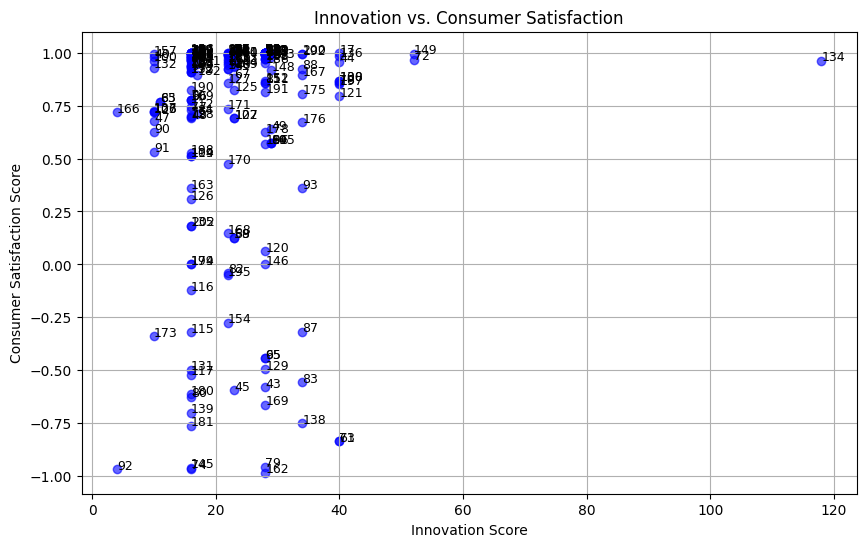

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(stop_words='english')
patent_abstracts = patents['abstract'].tolist()
review_texts = review['txt'].tolist()

all_texts = patent_abstracts + review_texts
tfidf_matrix = vectorizer.fit_transform(all_texts)

cosine_similarities = cosine_similarity(tfidf_matrix[:len(patent_abstracts)], tfidf_matrix[len(patent_abstracts):])

patent_ids = []
for review_idx in range(len(review_texts)):
    most_similar_patent_idx = cosine_similarities[:, review_idx].argmax()
    patent_ids.append(patents.iloc[most_similar_patent_idx]['publication number'])

merged_data = pd.DataFrame({
    'review_id': review.index,
    'review_text': review['txt'],
    'sentiment_score': review['compound'],
    'publication number': patent_ids
})

merged_data = merged_data.merge(patents, on='publication number')
merged_data['innovation_score'] = merged_data.apply(lambda row: row['cite'] + len(row['cpc']), axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['innovation_score'], merged_data['sentiment_score'], color='blue', alpha=0.6)
plt.title('Innovation vs. Consumer Satisfaction')
plt.xlabel('Innovation Score')
plt.ylabel('Consumer Satisfaction Score')
plt.grid(True)

for i, row in merged_data.iterrows():
    plt.text(row['innovation_score'], row['sentiment_score'], row['review_id'], fontsize=9)

plt.show()

In [ ]:
merged_data[merged_data['review_id']==134]

,review_id,review_text,sentiment_score,publication number,title,abstract,cpc,filed date,cite,innovation_score
183,134,"Just got the 2023 SEL AWD and, boy, is it a ni...",0.9617,US11920938,Autonomous electric vehicle charging,Methods and systems for autonomous vehicle rec...,"B60L, B60P, B60R, B60W, G01C, G01B, G01S, G05B...",2020. 10. 28,0,118


In [ ]:
pip install sentence_transformers

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


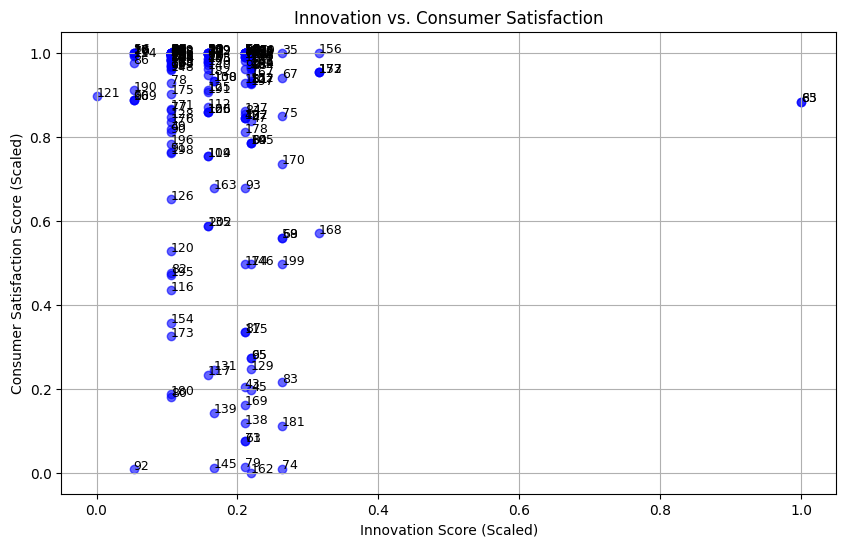

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
patent_embeddings = model.encode(patents['abstract'].tolist())
review_embeddings = model.encode(review['txt'].tolist())

cosine_similarities = cosine_similarity(patent_embeddings, review_embeddings)

patent_ids = []
for review_idx in range(len(review)):
    most_similar_patent_idx = cosine_similarities[:, review_idx].argmax()
    patent_ids.append(patents.iloc[most_similar_patent_idx]['publication number'])

merged_data = pd.DataFrame({
    'review_id': review.index,
    'review_text': review['txt'],
    'sentiment_score': review['compound'],
    'publication number': patent_ids
})

merged_data = merged_data.merge(patents, on='publication number')
merged_data['innovation_score'] = merged_data.apply(lambda row: row['cite'] + len(row['cpc']), axis=1)

scaler = MinMaxScaler()
merged_data[['innovation_score_scaled', 'sentiment_score_scaled']] = scaler.fit_transform(
    merged_data[['innovation_score', 'sentiment_score']]
)

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['innovation_score_scaled'], merged_data['sentiment_score_scaled'], color='blue', alpha=0.6)
plt.title('Innovation vs. Consumer Satisfaction')
plt.xlabel('Innovation Score (Scaled)')
plt.ylabel('Consumer Satisfaction Score (Scaled)')
plt.grid(True)

for i, row in merged_data.iterrows():
    plt.text(row['innovation_score_scaled'], row['sentiment_score_scaled'], row['review_id'], fontsize=9)

plt.show()

In [ ]:
merged_data[merged_data['review_id']==85]

,review_id,review_text,sentiment_score,publication number,title,abstract,cpc,filed date,cite,innovation_score,innovation_score_scaled,sentiment_score_scaled
152,85,50k mile update! no issues so far. range is st...,0.7678,US11920938,Autonomous electric vehicle charging,Methods and systems for autonomous vehicle rec...,"B60L, B60P, B60R, B60W, G01C, G01B, G01S, G05B...",2020. 10. 28,0,118,1.0,0.883047


In [ ]:
merged_data[merged_data['review_id']==85]['title']

152    Autonomous electric vehicle charging
Name: title, dtype: object

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_id                203 non-null    int64  
 1   review_text              203 non-null    object 
 2   sentiment_score          203 non-null    float64
 3   publication number       203 non-null    object 
 4   title                    203 non-null    object 
 5   abstract                 203 non-null    object 
 6   cpc                      203 non-null    object 
 7   filed date               203 non-null    object 
 8   cite                     203 non-null    int64  
 9   innovation_score         203 non-null    int64  
 10  innovation_score_scaled  203 non-null    float64
 11  sentiment_score_scaled   203 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 19.2+ KB


In [ ]:
from keyphrasetransformer import KeyPhraseTransformer

kp = KeyPhraseTransformer()

kp.get_key_phrases(merged_data.iloc[152]['abstract'])

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


['autonomous vehicles',
 'recharging',
 'refueling',
 'autonomous electric vehicles',
 'use profile',
 'vehicle charging']

In [ ]:
kp.get_key_phrases(merged_data.iloc[152]['review_text'])

['battery',
 'range',
 'noise reduction',
 'i would get a model y if given the choice now but at the time it was the best ev deal']

In [ ]:
pip install pytextrank

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
import pytextrank

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("textrank")

doc = nlp(merged_data.iloc[152]['abstract'])

for phrase in doc._.phrases:
    print(phrase.text)

/usr/local/lib/python3.10/dist-packages
autonomous vehicle recharging
Autonomous electric vehicles
available charging stations
an autonomous electric vehicle
use
location
Methods
methods
a predicted use profile
the predicted use profile
operation
point
board
the vehicle
the vehicles
a charging station
order
refueling
systems
a recharging threshold
its starting location
the battery
A charge level
a time
some embodiments
it
which
